<div style="background-color: #e6eef7; padding:30px; text-align: center;">
    
# Część 2 - Analiza Eksploracyjna
##### Inga Maziarz, Krzysztof Budzyński

</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

<div style="background-color: #e6eef7; padding:30px;">

# Zbiór danych

Analizowanym zbiorem danych jest zbiór zawierający blisko 9 tysięcy rekordów popularnych produktów spożywczych wraz z kalorycznością produktu w porcji 100 gramów oraz zawartością poszczególnych makro- i mikrokskładników (około 70 różnych związków/pierwiastków). Przed analizą dane zostały odpowiednio przygotowane, tj.:
* Usunięto zbędne kolumny. 

> Pierwsza kolumna zawierała indeks produktu - było to powieleniem indeksów powstałych poprzez włożenie danych do ramki.

> Wszystkie wartości w kolumnie *serving_size* były jednakowe. Przyjęto, że kaloryczność każdego produktu podana jest jako kcal/100 g

> Wszystkie wartości w kolumnie *lucopene* były jednakowe i równe zeru. 

* W miarę możliwości zamieniono dane na typ numeryczny.

> W danej kolumnie wartości były wyrażone w tych samych jednostkach. Zanotowano tę jednostkę w nazwie kolumny, a wartości zostały przekonwertowane na typ *float*

* Obsłużono rekordy z wartościami *NaN*

> Wywnioskowano, że w tym przypadku wartości *NaN* oznaczają wartości bliskie zeru, więc zostały one zastąpione zerami.

Ostatecznie usunięto 3 kolumny. Liczba rekordów pozostała taka sama.
</div>

In [2]:
df = pd.read_csv('nutrition.csv') 
df

Unnamed: 0                                               name  \
0              0                                         Cornstarch   
1              1                                       Nuts, pecans   
2              2                                      Eggplant, raw   
3              3                                     Teff, uncooked   
4              4                                    Sherbet, orange   
...          ...                                                ...   
8784        8784  Beef, raw, all grades, trimmed to 0" fat, sepa...   
8785        8785  Lamb, cooked, separable lean only, composite o...   
8786        8786  Lamb, raw, separable lean and fat, composite o...   
8787        8787  Beef, raw, all grades, trimmed to 0" fat, sepa...   
8788        8788  Beef, raw, all grades, trimmed to 0" fat, sepa...   

     serving_size  calories total_fat saturated_fat cholesterol    sodium  \
0           100 g       381      0.1g           NaN           0   9.00 mg   
1           100 g       691       72g          6.2g           0   0.00 mg   
2           100 g        25      0.2g           NaN           0   2.00 mg   
3           100 g       367      2.4g          0.4g           0  12.00 mg   
4           100 g       144        2g          1.2g         1mg  46.00 mg   
...           ...       ...       ...           ...         ...       ...   
8784        100 g       125      3.5g          1.4g        62mg  54.00 mg   
8785        100 g       206      8.9g          3.9g       109mg  50.00 mg   
8786        100 g       277       23g           12g        78mg  39.00 mg   
8787        100 g       121        3g          1.1g        60mg  53.00 mg   
8788        100 g       121        3g          1.1g        60mg  53.00 mg   

      choline     folate  ...      fat saturated_fatty_acids  \
0      0.4 mg   0.00 mcg  ...   0.05 g               0.009 g   
1     40.5 mg  22.00 mcg  ...  71.97 g               6.180 g   
2      6.9 mg  22.00 mcg  ...   0.18 g               0.034 g   
3     13.1 mg          0  ...   2.38 g               0.449 g   
4      7.7 mg   4.00 mcg  ...   2.00 g               1.160 g   
...       ...        ...  ...      ...                   ...   
8784  64.5 mg   4.00 mcg  ...   3.50 g               1.353 g   
8785        0   0.00 mcg  ...   8.86 g               3.860 g   
8786        0   1.00 mcg  ...  22.74 g              11.570 g   
8787  64.2 mg   4.00 mcg  ...   3.04 g               1.086 g   
8788  64.2 mg   4.00 mcg  ...   3.04 g               1.086 g   

     monounsaturated_fatty_acids polyunsaturated_fatty_acids  \
0                        0.016 g                     0.025 g   
1                       40.801 g                    21.614 g   
2                        0.016 g                     0.076 g   
3                        0.589 g                     1.071 g   
4                        0.530 g                     0.080 g   
...                          ...                         ...   
8784                     1.554 g                     0.244 g   
8785                     3.480 g                     0.520 g   
8786                     8.720 g                     0.980 g   
8787                     1.266 g                     0.233 g   
8788                     1.266 g                     0.233 g   

     fatty_acids_total_trans alcohol     ash caffeine theobromine    water  
0                    0.00 mg   0.0 g  0.09 g  0.00 mg     0.00 mg   8.32 g  
1                    0.00 mg   0.0 g  1.49 g  0.00 mg     0.00 mg   3.52 g  
2                    0.00 mg   0.0 g  0.66 g  0.00 mg     0.00 mg  92.30 g  
3                          0       0  2.37 g        0           0   8.82 g  
4                    1.00 mg   0.0 g  0.40 g  0.00 mg     0.00 mg  66.10 g  
...                      ...     ...     ...      ...         ...      ...  
8784                62.00 mg   0.0 g  1.11 g  0.00 mg     0.00 mg  72.51 g  
8785               109.00 mg       0  1.60 g        0           0  59.95 g

In [3]:
df.drop(df.columns[0], axis=1, inplace=True) #usuwam kolumnę z indeksami
df.drop(df.columns[1], axis=1, inplace=True) #usuwam kolumnę z gramaturą (wszędzie 100 g)
df.drop('lucopene', axis=1, inplace=True) #likopen ma wszędzie wartość 0
df['vitamin_a'] = df['vitamin_a'].str.replace('mcg', "") #tu były zaśmiecone jednostki

In [4]:
g_cols = ['total_fat', 'saturated_fat', 'protein', 'alanine', 'arginine', 'aspartic_acid', 'cystine', 'glutamic_acid', 'glycine', 'histidine', 'hydroxyproline', 'isoleucine', 'leucine', 'lysine', 'methionine', 'phenylalanine', 'proline', 'serine', 'threonine', 'tryptophan', 'tyrosine', 'valine', 'carbohydrate', 'fiber', 'sugars', 'fructose', 'galactose', 'glucose', 'lactose', 'maltose', 'sucrose', 'fat', 'saturated_fatty_acids', 'monounsaturated_fatty_acids', 'polyunsaturated_fatty_acids', 'alcohol', 'ash', 'water']
mg_cols = ['cholesterol', 'sodium', 'choline', 'niacin', 'pantothenic_acid', 'riboflavin', 'thiamin', 'vitamin_b6', 'vitamin_c', 'vitamin_e', 'tocopherol_alpha', 'calcium', 'copper', 'irom', 'magnesium', 'manganese', 'phosphorous', 'potassium', 'zink', 'fatty_acids_total_trans', 'caffeine', 'theobromine']
mcg_cols = ['folate', 'folic_acid', 'vitamin_a_rae', 'carotene_alpha', 'carotene_beta', 'cryptoxanthin_beta', 'lutein_zeaxanthin', 'vitamin_b12', 'vitamin_k', 'selenium']
iu_cols = ['vitamin_a', 'vitamin_d']

units_dict = {"g": g_cols, "mg": mg_cols, "mcg": mcg_cols, " IU": iu_cols}

for unit, cols in units_dict.items():
    for col in cols:
        df[col] = df[col].str.replace(unit, "")
        df[col].fillna(0, inplace=True)
        df[col] = df[col].astype(float)
        df.rename(columns={col: col + "_" + unit}, inplace=True)


In [5]:
df.iloc[:, 1:]

calories  total_fat_g  saturated_fat_g  cholesterol_mg  sodium_mg  \
0          381          0.1              0.0             0.0        9.0   
1          691         72.0              6.2             0.0        0.0   
2           25          0.2              0.0             0.0        2.0   
3          367          2.4              0.4             0.0       12.0   
4          144          2.0              1.2             1.0       46.0   
...        ...          ...              ...             ...        ...   
8784       125          3.5              1.4            62.0       54.0   
8785       206          8.9              3.9           109.0       50.0   
8786       277         23.0             12.0            78.0       39.0   
8787       121          3.0              1.1            60.0       53.0   
8788       121          3.0              1.1            60.0       53.0   

      choline_mg  folate_mcg  folic_acid_mcg  niacin_mg  pantothenic_acid_mg  \
0            0.4         0.0             0.0      0.000                0.000   
1           40.5        22.0             0.0      1.167                0.863   
2            6.9        22.0             0.0      0.649                0.281   
3           13.1         0.0             0.0      3.363                0.942   
4            7.7         4.0             0.0      0.063                0.224   
...          ...         ...             ...        ...                  ...   
8784        64.5         4.0             0.0      6.422                0.356   
8785         0.0         0.0             0.0      7.680                0.580   
8786         0.0         1.0             0.0      6.550                0.520   
8787        64.2         4.0             0.0      6.720                0.355   
8788        64.2         4.0             0.0      6.720                0.355   

      ...  fat_g  saturated_fatty_acids_g  monounsaturated_fatty_acids_g  \
0     ...   0.05                    0.009                          0.016   
1     ...  71.97                    6.180                         40.801   
2     ...   0.18                    0.034                          0.016   
3     ...   2.38                    0.449                          0.589   
4     ...   2.00                    1.160                          0.530   
...   ...    ...                      ...                            ...   
8784  ...   3.50                    1.353                          1.554   
8785  ...   8.86                    3.860                          3.480   
8786  ...  22.74                   11.570                          8.720   
8787  ...   3.04                    1.086                          1.266   
8788  ...   3.04                    1.086                          1.266   

      polyunsaturated_fatty_acids_g  fatty_acids_total_trans_mg  alcohol_g  \
0                             0.025                         0.0        0.0   
1                            21.614                         0.0        0.0   
2                             0.076                         0.0        0.0   
3                             1.071                         0.0        0.0   
4                             0.080                         1.0        0.0   
...                             ...                         ...        ...   
8784                          0.244                        62.0        0.0   
8785                          0.520                       109.0        0.0   
8786                          0.980                        78.0        0.0   
8787                          0.233                        60.0        0.0   
8788                          0.233                        60.0        0.0   

      ash_g  caffeine_mg  theobromine_mg  water_g  
0      0.09          0.0             0.0     8.32  
1      1.49          0.0             0.0     3.52  
2      0.66          0.0             0.0    92.30  
3      2.37          0.0             0.0     8.82  
4      0.40          0.0          

<div style="background-color: #e6eef7; padding:30px;">

## Podział danych
Dane podzielono na 3 podzbiory:
* *df_macro_general* - zbiór zawierający kolumny opisujące ogólną zawartość makroskładników, tj. tłuszczy, białka, węglowodanów
* *df_macro_specific* - zbiór zawierający kolumny opisujące zawartość poszczególnych związków zaliczane do makroskładników (bez ich ogólnej zawartości)
* *df_micro* - zbiór zawierający kolumny opisujące zawartość mikroskładników


Wszystkie z nowo utworzonych ramek zawierają również kolumny z informacją na temat nazwy produktu i jego kaloryczności.
    </div>

In [6]:
df_macro_general = df[['name', 'calories', 'total_fat_g', 'protein_g','carbohydrate_g']]
df_macro_specific = df[['name', 'calories', 'saturated_fat_g', 'alanine_g','arginine_g', 'aspartic_acid_g', 'cystine_g', 'glutamic_acid_g','glycine_g', 'histidine_g', 'hydroxyproline_g', 'isoleucine_g','leucine_g', 'lysine_g', 'methionine_g', 'phenylalanine_g', 'proline_g','serine_g', 'threonine_g', 'tryptophan_g', 'tyrosine_g', 'valine_g','fiber_g', 'sugars_g', 'fructose_g', 'galactose_g','glucose_g', 'lactose_g', 'maltose_g', 'sucrose_g','saturated_fatty_acids_g', 'monounsaturated_fatty_acids_g','polyunsaturated_fatty_acids_g', 'fatty_acids_total_trans_mg','alcohol_g', 'ash_g', 'water_g']]
df_micro = df[['name', 'calories', 'cholesterol_mg', 'sodium_mg', 'choline_mg', 'folate_mcg', 'folic_acid_mcg', 'niacin_mg','pantothenic_acid_mg', 'riboflavin_mg', 'thiamin_mg', 'vitamin_a_ IU','vitamin_a_rae_mcg', 'carotene_alpha_mcg', 'carotene_beta_mcg','cryptoxanthin_beta_mcg', 'lutein_zeaxanthin_mcg', 'vitamin_b12_mcg','vitamin_b6_mg', 'vitamin_c_mg', 'vitamin_d_ IU', 'vitamin_e_mg','tocopherol_alpha_mg', 'vitamin_k_mcg', 'calcium_mg', 'copper_mg','irom_mg', 'magnesium_mg', 'manganese_mg', 'phosphorous_mg','potassium_mg', 'selenium_mcg', 'zink_mg', 'caffeine_mg', 'theobromine_mg']]

<div style="background-color: #e6eef7; padding:30px;">

## Badanie zakresów i stopnia zmienności 
Wiele zmiennych we wszystkich zbiorach ma podobne cechy, które mogą okazać się problematyczne z punktu widzenia regresji:
    
* Średnia arytmetyczna znacznie większa od mediany - sugeruje to istnienie rozkładu prawoskośnego (można będzie go zniwelować poprzez zlogarytmowanie zmiennej)

* Pierwszy, jak i w niektórych przypadkach drugi, kwartyl jest równy zeru. Wiele próbek z rozkładów może okazać się z tego powodu zbędnych.
    
Niektóre z cech wyrażonych w gramach (w ramkach *df_macro_general* i *df_macro_specific*) mają maksymalne wartości równe bądź bliskie 100. Te próbki mogą być wystarczające do predykcji kaloryczności na 100 g produktu.
    
Dodatkowo odchylenia standardowe wszystkich cech są stosunkowo większe od zera. Gdyby wystąpiły takie cechy, mogłyby być one odrzucone ze względu na brak użyteczności.
    
</div>

In [7]:
df_macro_general.describe()

calories  total_fat_g    protein_g  carbohydrate_g
count  8789.000000  8789.000000  8789.000000     8789.000000
mean    226.283878    10.556855    11.345616       22.121915
std     169.862001    15.818247    10.530602       27.266261
min       0.000000     0.000000     0.000000        0.000000
25%      91.000000     1.000000     2.380000        0.050000
50%     191.000000     5.100000     8.020000        9.340000
75%     337.000000    14.000000    19.880000       34.910000
max     902.000000   100.000000    88.320000      100.000000

In [8]:
df_macro_specific.describe()

calories  saturated_fat_g    alanine_g   arginine_g  \
count  8789.000000      8789.000000  8789.000000  8789.000000   
mean    226.283878         3.434281     0.486991     0.564506   
std     169.862001         6.429758     0.659244     0.775294   
min       0.000000         0.000000     0.000000     0.000000   
25%      91.000000         0.100000     0.000000     0.000000   
50%     191.000000         1.400000     0.085000     0.097000   
75%     337.000000         4.200000     1.034000     1.188000   
max     902.000000        96.000000     8.009000     7.436000   

       aspartic_acid_g    cystine_g  glutamic_acid_g    glycine_g  \
count      8789.000000  8789.000000      8789.000000  8789.000000   
mean          0.768497     0.104868         1.459090     0.445260   
std           1.044862     0.140665         1.818475     0.678858   
min           0.000000     0.000000         0.000000     0.000000   
25%           0.000000     0.000000         0.000000     0.000000   
50%           0.145000     0.017000         0.336000     0.064000   
75%           1.617000     0.216000         2.989000     0.920000   
max          10.203000     2.212000        17.452000    19.049000   

       histidine_g  hydroxyproline_g  ...    lactose_g    maltose_g  \
count  8789.000000       8789.000000  ...  8789.000000  8789.000000   
mean      0.270972          0.025559  ...     0.132518     0.071506   
std       0.366762          0.077800  ...     1.844355     0.439321   
min       0.000000          0.000000  ...     0.000000     0.000000   
25%       0.000000          0.000000  ...     0.000000     0.000000   
50%       0.044000          0.000000  ...     0.000000     0.000000   
75%       0.544000          0.000000  ...     0.000000     0.000000   
max       2.999000          1.130000  ...    56.000000    10.040000   

         sucrose_g  saturated_fatty_acids_g  monounsaturated_fatty_acids_g  \
count  8789.000000              8789.000000                    8789.000000   
mean      0.577029                 3.434146                       3.772313   
std       3.952760                 6.426586                       6.826234   
min       0.000000                 0.000000                       0.000000   
25%       0.000000                 0.149000                       0.074000   
50%       0.000000                 1.435000                       1.600000   
75%       0.000000                 4.174000                       4.760000   
max      99.800000                95.600000                      83.689000   

       polyunsaturated_fatty_acids_g  fatty_acids_total_trans_mg    alcohol_g  \
count                    8789.000000                 8789.000000  8789.000000   
mean                        2.114332                   38.723063     0.117522   
std                         5.050045                  117.358944     1.600127   
min                         0.000000                    0.000000     0.000000   
25%                         0.134000                    0.000000     0.000000   
50%                         0.591000                    2.000000     0.000000   
75%                         1.880000                   65.000000     0.000000   
max                        74.623000                 3100.000000    42.500000   

             ash_g      water_g  
count  8789.000000  8789.000000  
mean      1.717408    54.112074  
std       2.967751    30.772999  
min       0.000000     0.000000  
25%       0.770000    29.700000  
50%       1.170000    63.080000  
75%       2.020000    77.960000  
max      99.800000   100.000000  

[8 rows x 36 columns]

In [9]:
df_micro.describe()

calories  cholesterol_mg     sodium_mg   choline_mg   folate_mcg  \
count  8789.000000     8789.000000   8789.000000  8789.000000  8789.000000   
mean    226.283878       38.723063    306.353851    23.681249    44.085561   
std     169.862001      117.358944    939.220468    51.332265   127.670410   
min       0.000000        0.000000      0.000000     0.000000     0.000000   
25%      91.000000        0.000000     36.000000     0.000000     2.000000   
50%     191.000000        2.000000     84.000000     1.600000     9.000000   
75%     337.000000       65.000000    396.000000    29.400000    35.000000   
max     902.000000     3100.000000  38758.000000  2403.300000  3786.000000   

       folic_acid_mcg    niacin_mg  pantothenic_acid_mg  riboflavin_mg  \
count     8789.000000  8789.000000          8789.000000    8789.000000   
mean        17.638639     3.400145             0.484268       0.235364   
std        100.736270     4.765302             1.251570       0.441263   
min          0.000000     0.000000             0.000000       0.000000   
25%          0.000000     0.374000             0.000000       0.047000   
50%          0.000000     2.111000             0.274000       0.151000   
75%          0.000000     5.063000             0.626000       0.260000   
max       2993.000000   127.500000            34.500000      17.500000   

        thiamin_mg  ...    copper_mg      irom_mg  magnesium_mg  manganese_mg  \
count  8789.000000  ...  8789.000000  8789.000000   8789.000000   8789.000000   
mean      0.207929  ...     0.167482     2.645764     32.262032      0.495872   
std       0.510359  ...     0.543426     5.661046     55.837795      6.301953   
min       0.000000  ...     0.000000     0.000000      0.000000      0.000000   
25%       0.030000  ...     0.028000     0.490000     10.000000      0.000000   
50%       0.077000  ...     0.077000     1.310000     20.000000      0.022000   
75%       0.227000  ...     0.140000     2.570000     29.000000      0.222000   
max      23.375000  ...    15.050000   123.600000    781.000000    328.000000   

       phosphorous_mg  potassium_mg  selenium_mcg      zink_mg  caffeine_mg  \
count     8789.000000   8789.000000   8789.000000  8789.000000  8789.000000   
mean       153.844123    265.251223     12.478280     1.939745     2.608829   
std        202.198353    371.443524     27.072684     3.335766    82.070233   
min          0.000000      0.000000      0.000000     0.000000     0.000000   
25%         35.000000    111.000000      0.100000     0.220000     0.000000   
50%        129.000000    219.000000      4.000000     0.800000     0.000000   
75%        215.000000    329.000000     21.300000     2.660000     0.000000   
max       9918.000000  16500.000000   1917.000000    90.950000  5714.000000   

       theobromine_mg  
count     8789.000000  
mean         4.695642  
std         60.962608  
min          0.000000  
25%          0.000000  
50%          0.000000  
75%          0.000000  
max       2634.000000  

[8 rows x 34 columns]

<div style="background-color: #e6eef7; padding:30px;">


## Rozkład zmiennych - histogramy

Poniżej widać, że niektóre rozkłady prawoskośne bardziej przypominają rozkład normalny po zastosowaniu logarytmu, a inne pierwiastka. W tytułach wykresów zawarto informację o liczbie rekordów o zerowych wartościach, które zostały pominięte przy nakładaniu funkcji *log* lub *sqrt*.
    
</div>

In [10]:
# funkcja do wyświetlania histogramów dla każdej kolumny w danej ramce.
# możliwe wyświetlanie histogramów z nałożoną funkcją logarytmu lub pierwiastkowania (z wyłączeniem wartości zerowych).

def plot_histograms(df, log=False, sqrt=False, bins=50):
    columns_to_plot = list(df.iloc[:, 1:].columns)    
    num_rows = (len(columns_to_plot) // 2) + (len(columns_to_plot) % 2) 
    num_cols = 2

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
    for i, col in enumerate(columns_to_plot):
        row_idx = i // num_cols
        col_idx = i % num_cols
        
        if log:
            axes[row_idx, col_idx].hist(np.log(df[col][df[col] != 0]), bins=bins)
        elif sqrt:
            axes[row_idx, col_idx].hist(np.sqrt(df[col][df[col] != 0]), bins=bins)
        else:
            axes[row_idx, col_idx].hist(df[col], bins=bins)
            
        axes[row_idx, col_idx].set_title(f"column: {col} zeros:{(df[col] == 0).sum()}")
        
    plt.tight_layout()


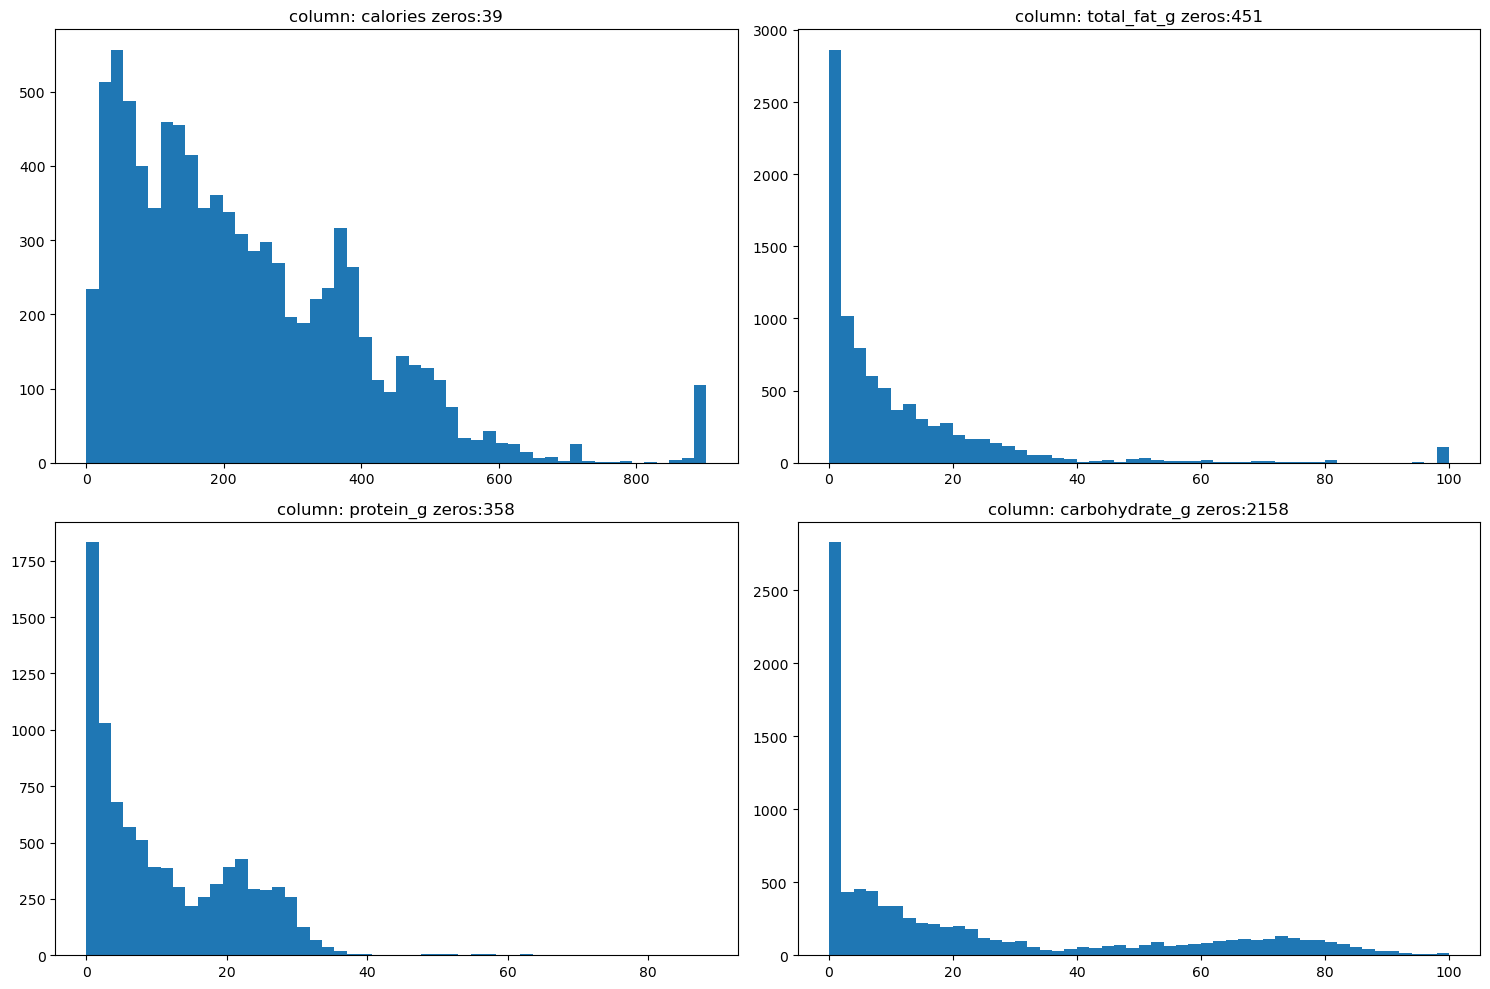

In [11]:
plot_histograms(df_macro_general)

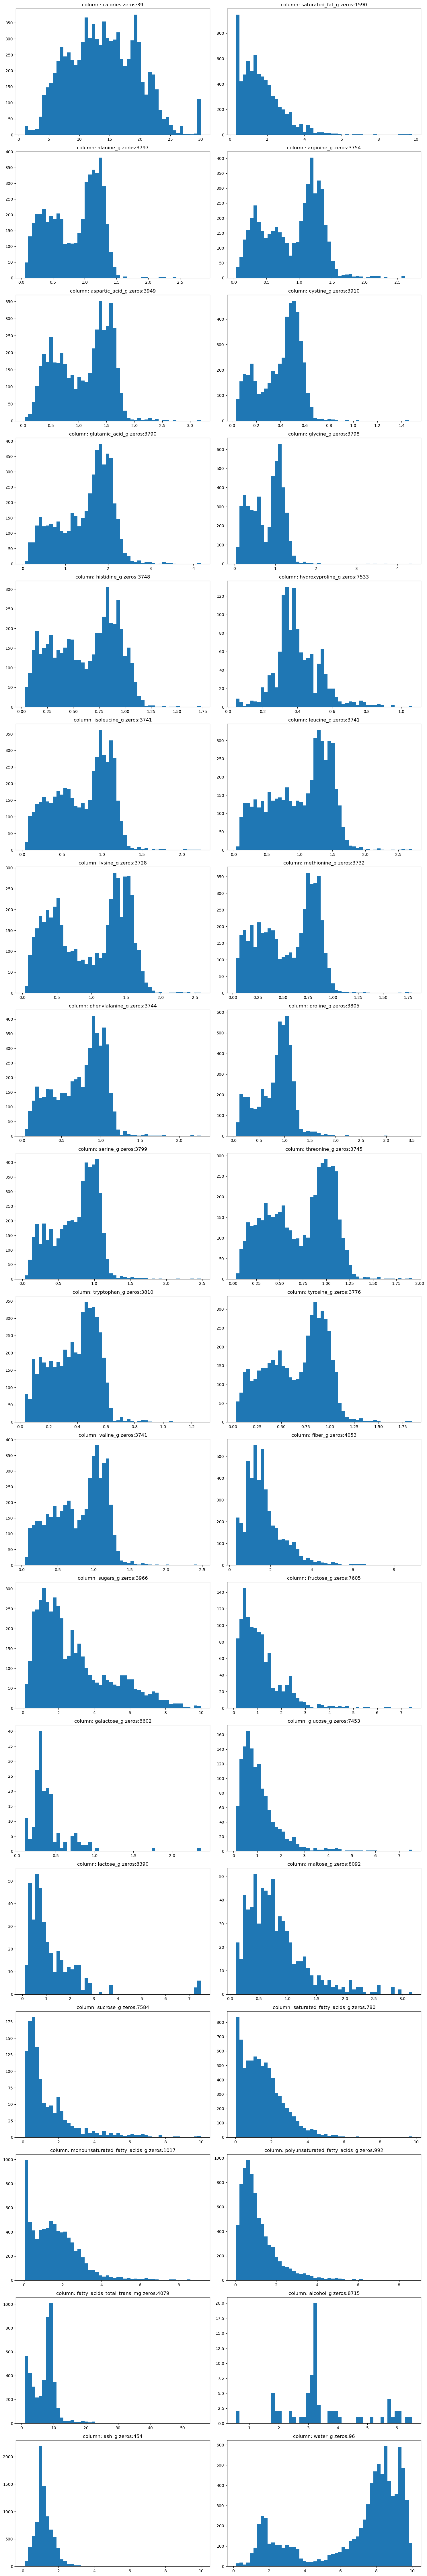

In [12]:
plot_histograms(df_macro_specific, sqrt=True)


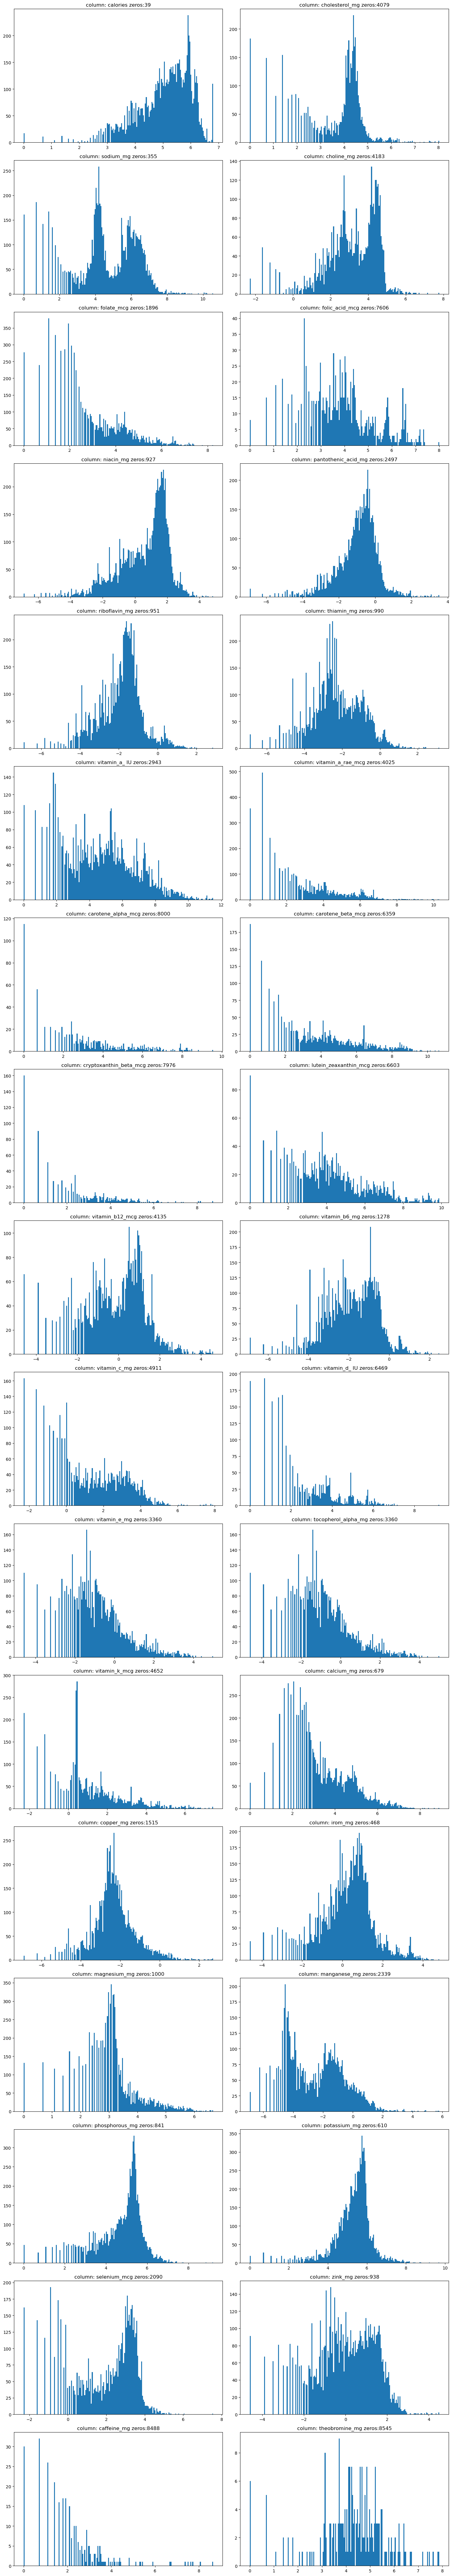

In [13]:
plot_histograms(df_micro, bins=200, log=True)

<div style="background-color: #e6eef7; padding:30px;">
Wykres przestawiający współczynniki zmienności poszczególnych zmiennych
</div>

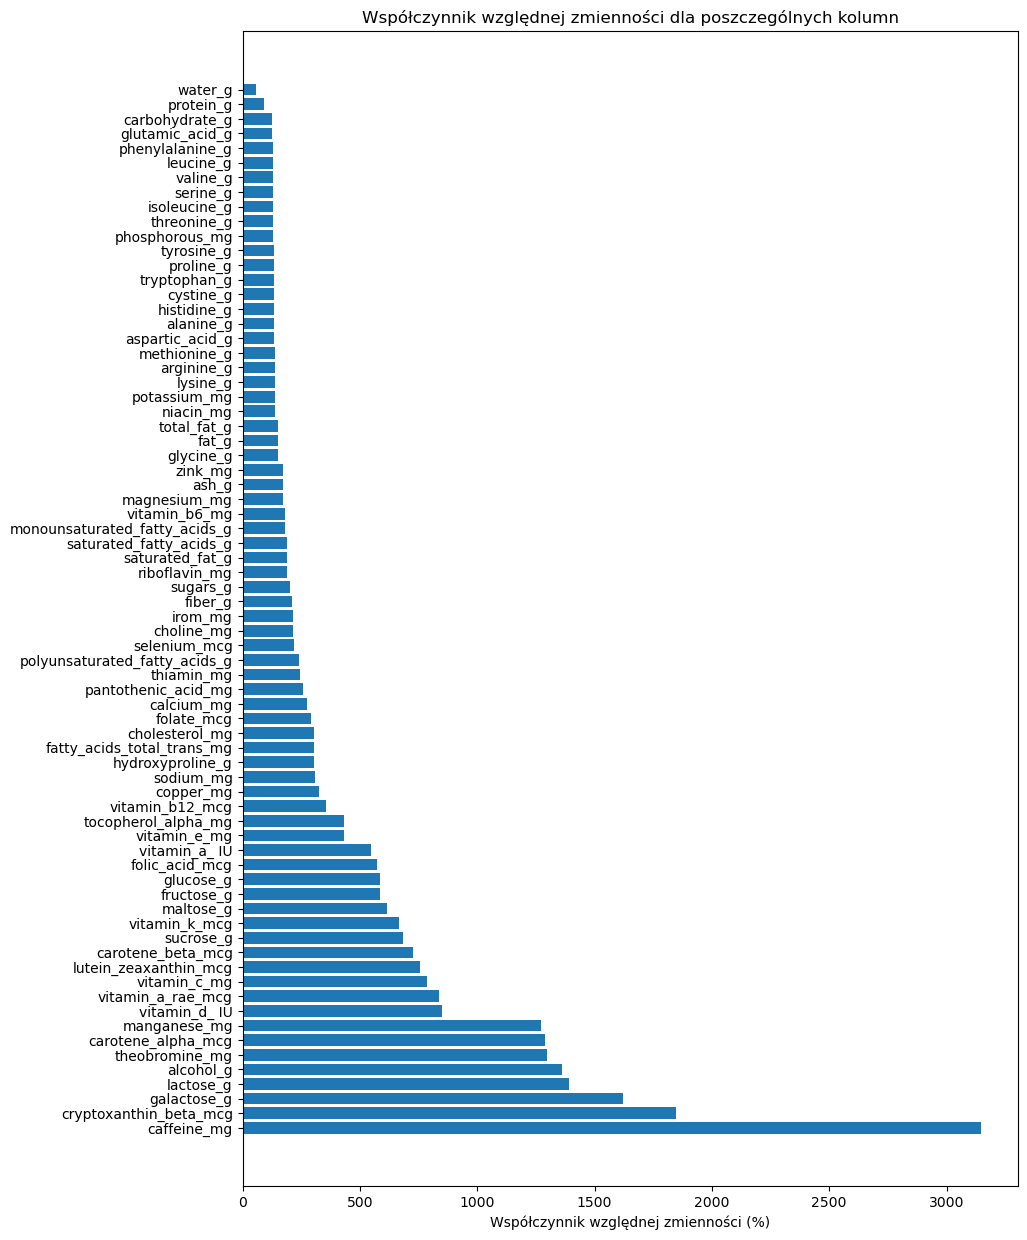

In [14]:
X = df.iloc[:,2:]
wsp = []
for col in X.columns:
    avg = np.average(X[col])
    std = np.std(X[col])
    wsp_zm = (std/avg) * 100
    wsp.append(wsp_zm)
    
indeksy = np.argsort(wsp)[::-1]
wsp = np.array(wsp)[indeksy]
nazwy = np.array(X.columns)[indeksy]

plt.figure(figsize=(10, 15))

plt.barh(nazwy, wsp)
plt.xlabel('Współczynnik względnej zmienności (%)')
plt.title('Współczynnik względnej zmienności dla poszczególnych kolumn')
plt.show()

<div style="background-color: #e6eef7; padding:30px;">
Widać, że największą zmienność posiadają składniki, których w większości produktów spożywczych nie ma, a w innych występują w dużych ilościach, przykładami są kofeina, alkohol i laktoza.
</div>

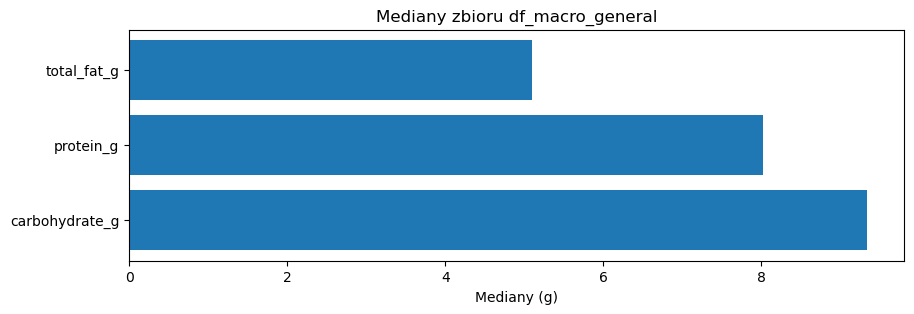

In [15]:
X = df_macro_general.iloc[:,2:]
wsp = []
for col in X.columns:
    wsp.append(np.median(X[col]))
    
indeksy = np.argsort(wsp)[::-1]
wsp = np.array(wsp)[indeksy]
nazwy = np.array(X.columns)[indeksy]

plt.figure(figsize=(10, 3))

plt.barh(nazwy, wsp)
plt.xlabel('Mediany (g)')
plt.title('Mediany zbioru df_macro_general')
plt.show()

<div style="background-color: #e6eef7; padding:30px;">
Mediany są mniej więcej równe, co pomaga w regresji w połączeniu z podobną zmiennością i skośnością
</div>

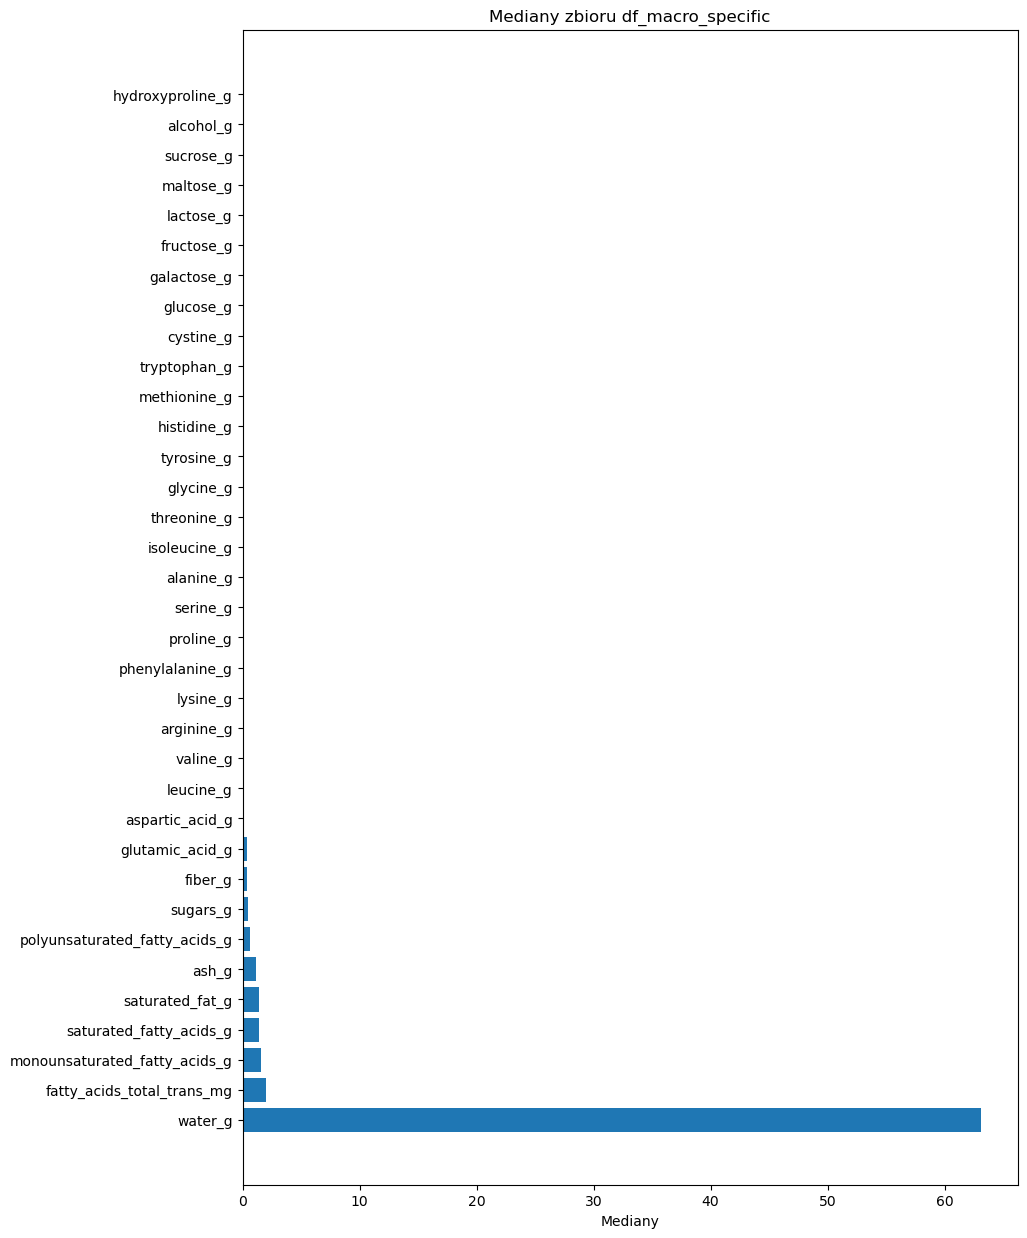

In [16]:
X = df_macro_specific.iloc[:,2:]
wsp = []
for col in X.columns:
    wsp.append(np.median(X[col]))
    
indeksy = np.argsort(wsp)[::-1]
wsp = np.array(wsp)[indeksy]
nazwy = np.array(X.columns)[indeksy]

plt.figure(figsize=(10, 15))

plt.barh(nazwy, wsp)
plt.xlabel('Mediany')
plt.title('Mediany zbioru df_macro_specific')
plt.show()

<div style="background-color: #e6eef7; padding:30px;">
Dla danych numerycznych na których pracujemy (>=0), mediana zerowa oznacza, że te cechy dla co najmniej połowy zbioru mają wartość 0.
</div>

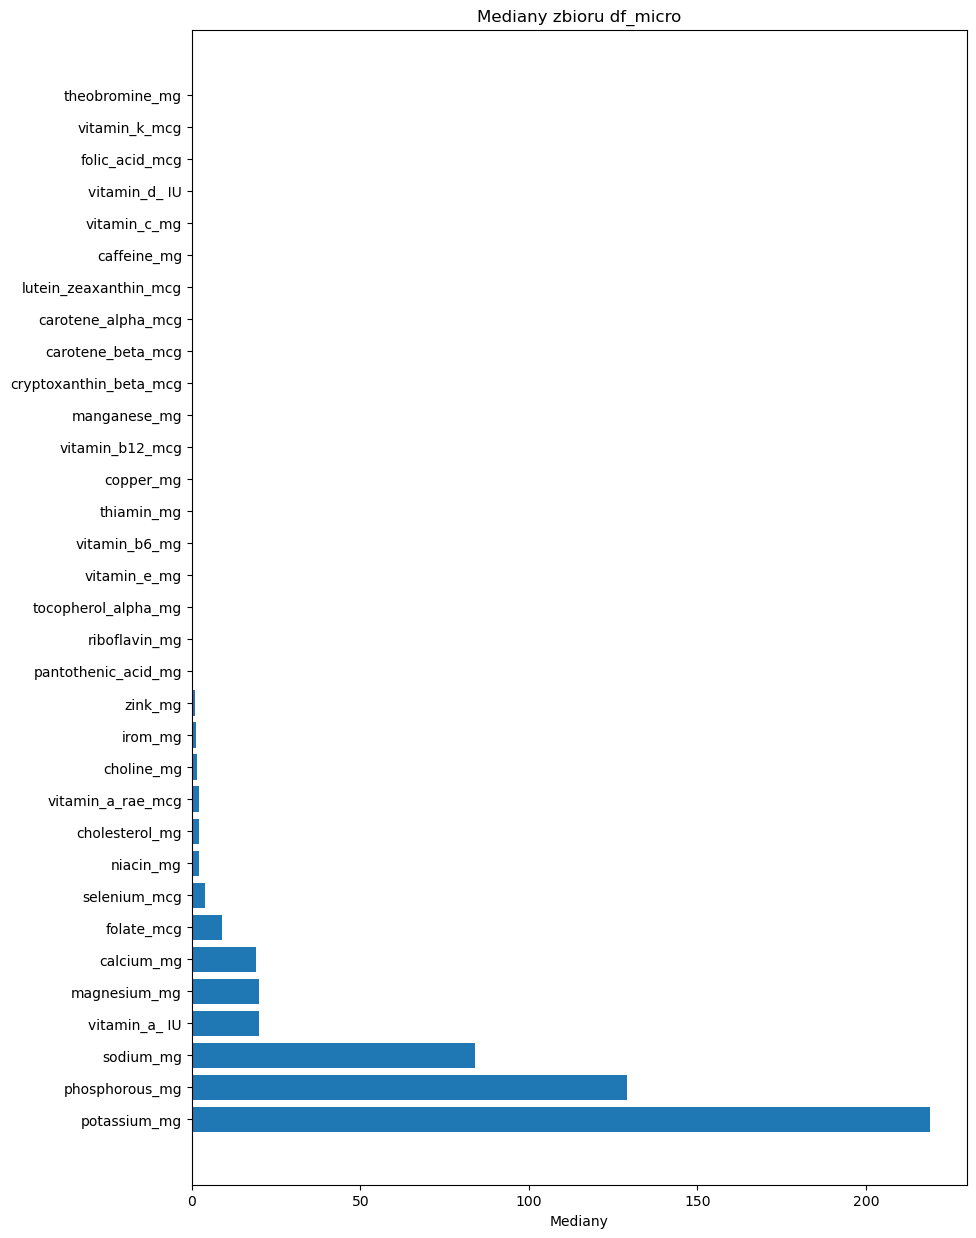

In [17]:
X = df_micro.iloc[:,2:]
wsp = []
for col in X.columns:
    wsp.append(np.median(X[col]))
    
indeksy = np.argsort(wsp)[::-1]
wsp = np.array(wsp)[indeksy]
nazwy = np.array(X.columns)[indeksy]

plt.figure(figsize=(10, 15))

plt.barh(nazwy, wsp)
plt.xlabel('Mediany')
plt.title('Mediany zbioru df_micro')
plt.show()

<div style="background-color: #e6eef7; padding:30px;">
Ponownie zbiór posiada wiele cech o częstym zerze, co może stanowić lekki problem w opracowaniu modelu regresji
</div>

<div style="background-color: #e6eef7; padding:30px;">
Wykres przestawiający współczynniki skośności poszczególnych zmiennych
</div>

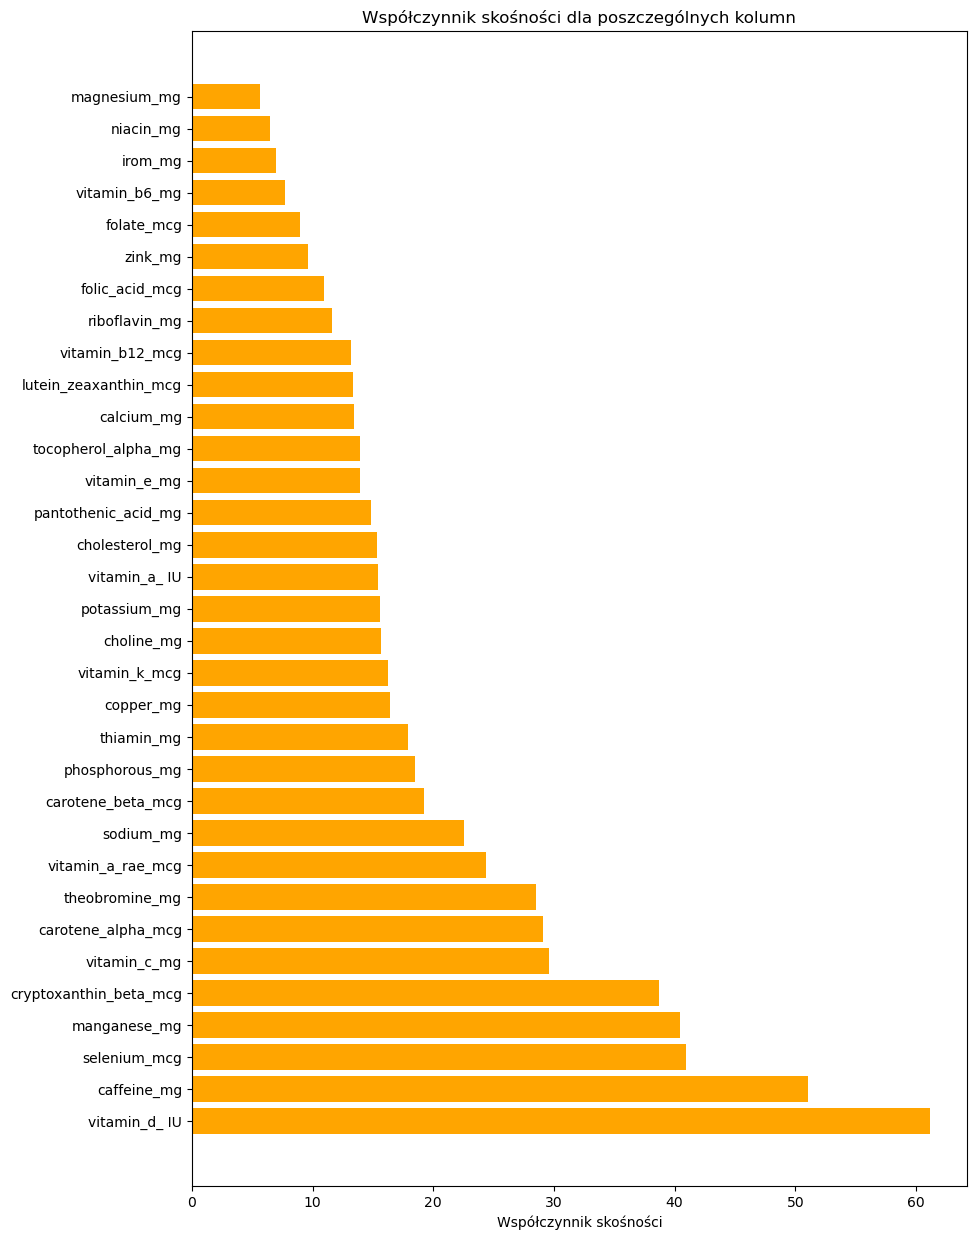

In [18]:
skosnosci = []
for col in X.columns:
    sk = X[col].skew()
    skosnosci.append(sk)

indeksy_skosnosci = np.argsort(skosnosci)[::-1]
skosnosci = np.array(skosnosci)[indeksy_skosnosci]
nazwy_skosnosci = np.array(X.columns)[indeksy_skosnosci]

plt.figure(figsize=(10, 15))

plt.barh(nazwy_skosnosci, skosnosci, color='orange')
plt.xlabel('Współczynnik skośności')
plt.title('Współczynnik skośności dla poszczególnych kolumn')
plt.show()

<div style="background-color: #e6eef7; padding:30px;">

## Korelacje
* *df_macro_general*
    
> Jeżeli rozpatrzymy problem przewidywania kalorii na podstawie makroskładników, to okazuje się, że najbardziej skorelowaną cechą ze zmienną objaśnianą jest *total_fat_g*. Zmienne objaśniające wykazują niewielką korelację (wyjątek: korelacja między *carbohydrate_g* i *protein_g*). Wszystkie cechy mogą okazać się istotne.
    
* *df_macro_specific*

> Wiele cech opisujących substancje zaliczane do makroskładników jest silnie skorelowanych między sobą. Rozważając problem regresji, można przypuścić, że część cech będzie wyeliminować z tego powodu (nie wniosą zbyt wiele do rozwiązania problemu). 
* *df_micro*
    
> Cechy w tym zbiorze są najmniej ze sobą skorelowane. Rozważając problem przewidywania kaloryczności można posłużyć się wieloma różnymi cechami, które mają bezwzględny współczynnik korelacji na poziomie 0.1 - 0.3. Kombinacja tych cech może dać w efekcie dobrą jakość przewidywania.
</div>

In [19]:
corr_macro_g = df_macro_general.iloc[:, 1:].corr()
corr_macro_g.style.background_gradient(cmap='coolwarm')

In [20]:
corr_macro_s = df_macro_specific.iloc[:, 1:].corr()
corr_macro_s.style.background_gradient(cmap='coolwarm')

In [21]:
corr_micro = df_micro.iloc[:, 1:].corr()
corr_micro.style.background_gradient(cmap='coolwarm')

<AxesSubplot:title={'center':'Korelacje zbioru macro_general'}>

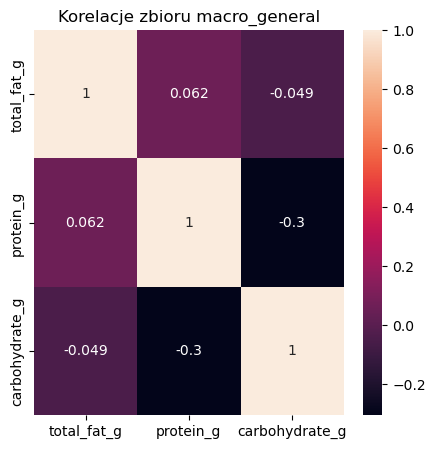

In [22]:
import seaborn as sns

X = df_macro_general.iloc[:,2:]
plt.figure(figsize=(5,5))
plt.title('Korelacje zbioru macro_general')
sns.heatmap(X.corr(), annot=X.corr())

<div style="background-color: #e6eef7; padding:30px;">
Cechy posiadają małe korelacje, co poprawia ich potencjał dobrego opisania zmiennej opisywanej regresją
</div>

<AxesSubplot:title={'center':'Korelacje zbioru macro_specific'}>

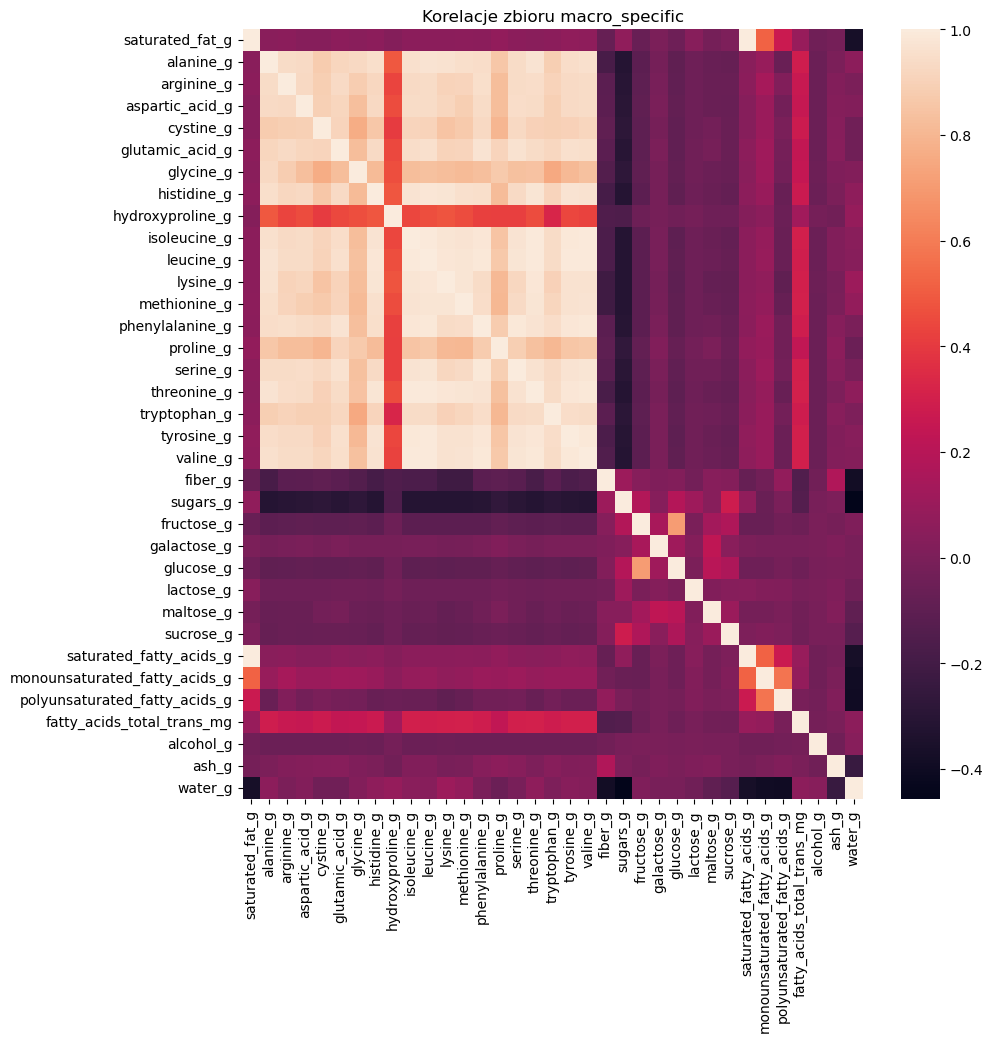

In [23]:
X = df_macro_specific.iloc[:,2:]
plt.figure(figsize=(10,10))
plt.title('Korelacje zbioru macro_specific')
sns.heatmap(X.corr())

<div style="background-color: #e6eef7; padding:30px;">
Występuje kwadrat wysokich korelacji, który można zredukować
</div>

In [24]:
corr = df_macro_specific.iloc[:, 1:].corr()
prog_korelacji = 0.8
skorelowane = set()
zbior = set()

for i in range(len(corr.columns)):
    for j in range(i+1, len(corr.columns)):
        kor = corr.iloc[i, j]
        if abs(kor > prog_korelacji):    # korelacje większe niż 0.7 można uważać za mocne
            #print(f'{corr.columns[i]} z {corr.columns[j]} ma wysokoą korelacje: {kor}')
            skorelowane.add(corr.columns[j])
            zbior.add(corr.columns[i])
            zbior.add(corr.columns[j])
            
print(f'Ilość kolumn z korelacją do innej kolumny powyżej {prog_korelacji}, które można usunąć do celów regresji: {len(skorelowane)}')

Ilość kolumn z korelacją do innej kolumny powyżej 0.8, które można usunąć do celów regresji: 18


<AxesSubplot:>

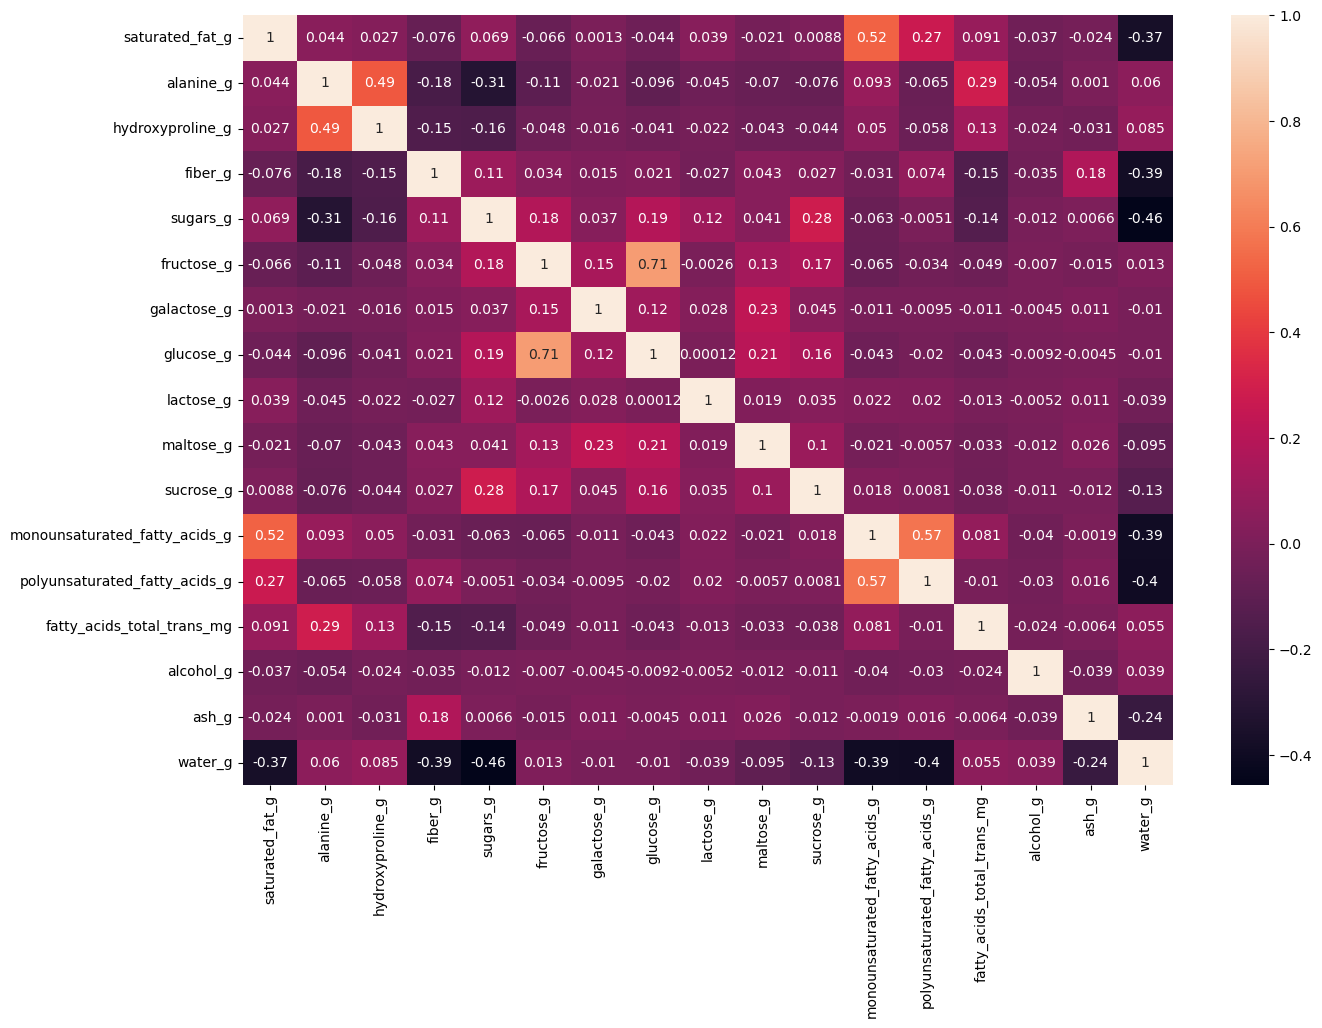

In [25]:
df_bez_korelacji = df_macro_specific.drop(columns=skorelowane)
import seaborn as sns

plt.figure(figsize=(15,10))
sns.heatmap(df_bez_korelacji.iloc[:,2:].corr(), annot=df_bez_korelacji.iloc[:,2:].corr())

<div style="background-color: #e6eef7; padding:30px;">
To są korelacje tego samego zbioru, co poprzednio po usunięciu z nich silnie skorelowanych cech
</div>

<AxesSubplot:title={'center':'Korelacje zbioru micro'}>

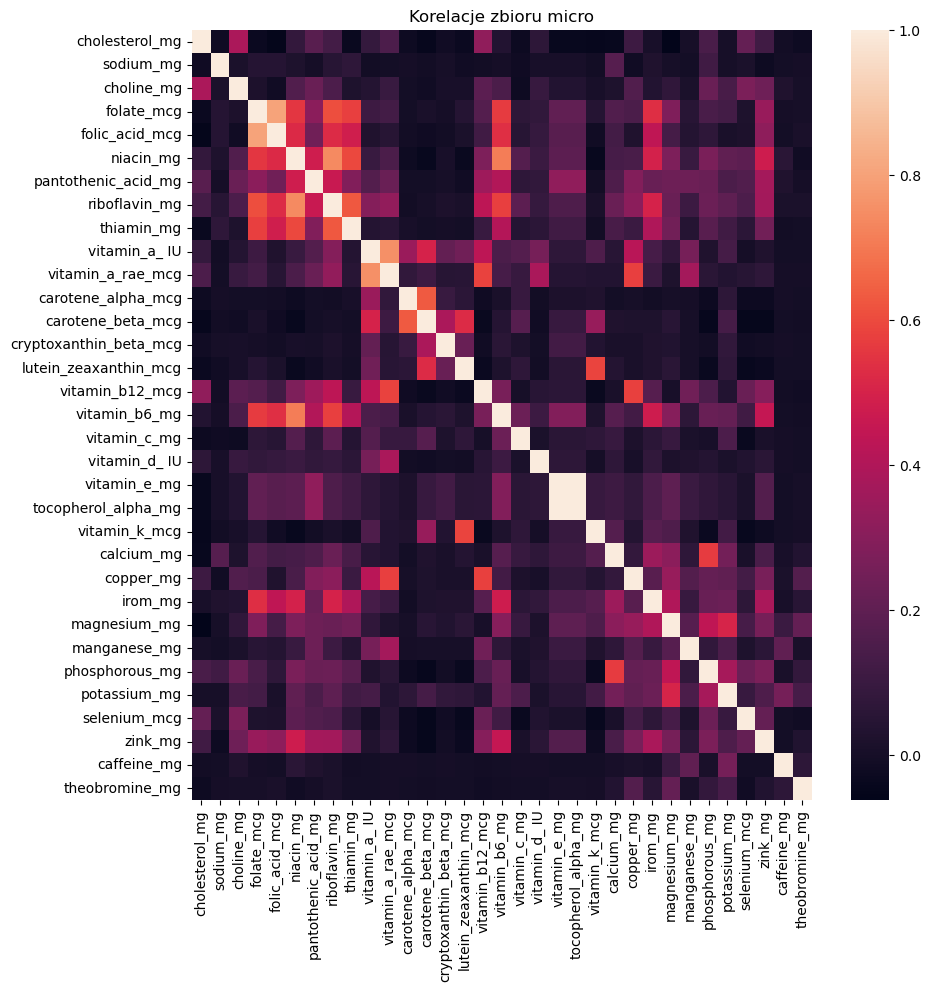

In [26]:
X = df_micro.iloc[:,2:]
plt.figure(figsize=(10,10))
plt.title('Korelacje zbioru micro')
sns.heatmap(X.corr())

<div style="background-color: #e6eef7; padding:30px;">
Pomimo wszystkich czynników potencjalnie utrudniających regresję modelu na mikroskładnikach, korelacje są niskie, co może pomóc w regresji
</div>

<div style="background-color: #e6eef7; padding:30px;">

## Wizualizacje
    
Aby przedstawić dane w sposób wizualny, posłużono się dwoma metodami redukcji wymiarów - PCA (analizę głównych składowych) oraz t-SNE (stochastyczną metodę porządkowania sąsiadów w oparciu o rozkład t). Na podstawie tych wykresów można przypuszczać, czy skuteczne okaże się dopasowanie modelu liniowego (PCA) lub nieliniowego (t-SNE). Kolory punktów odpowiadają kaloryczności. 
    
    
W przypadku ramek *df_macro_general* i *df_macro_specific* na obu wykresach widać bardzo ładną, regularną strukturę punktów. Można założyć, że model liniowy będzie dla tych danych wystarczający, a predykcja będzie dokonywana z dużą dokładnością. 
    
    
Wykres PCA ramki *df_micro* wykazuje pewną regularność, jednak punkty bardziej na siebie nachodzą. Można wnioskować, że model liniowy może się okazać dla tych danych niewystarczający, przewidywanie będzie realizowane  bardziej na zasadzie niska-wysoka kaloryczność. Na wykresie t-SNE widać większe rozdzielenie klastrów. Można będzie więc spróbować dopasować do danych model nieliniowy. 
</div>

In [27]:
def plot_pca(df):
    scaled_data = preprocessing.scale(df.iloc[:, 2:])
    
    pca = PCA(n_components=2)
    pca.fit(scaled_data)
    pca_data = pca.transform(scaled_data)

    plt.figure(figsize=(28, 12))
    plt.scatter(pca_data[:, 0], pca_data[:, 1], c=df.iloc[:, 1].values)


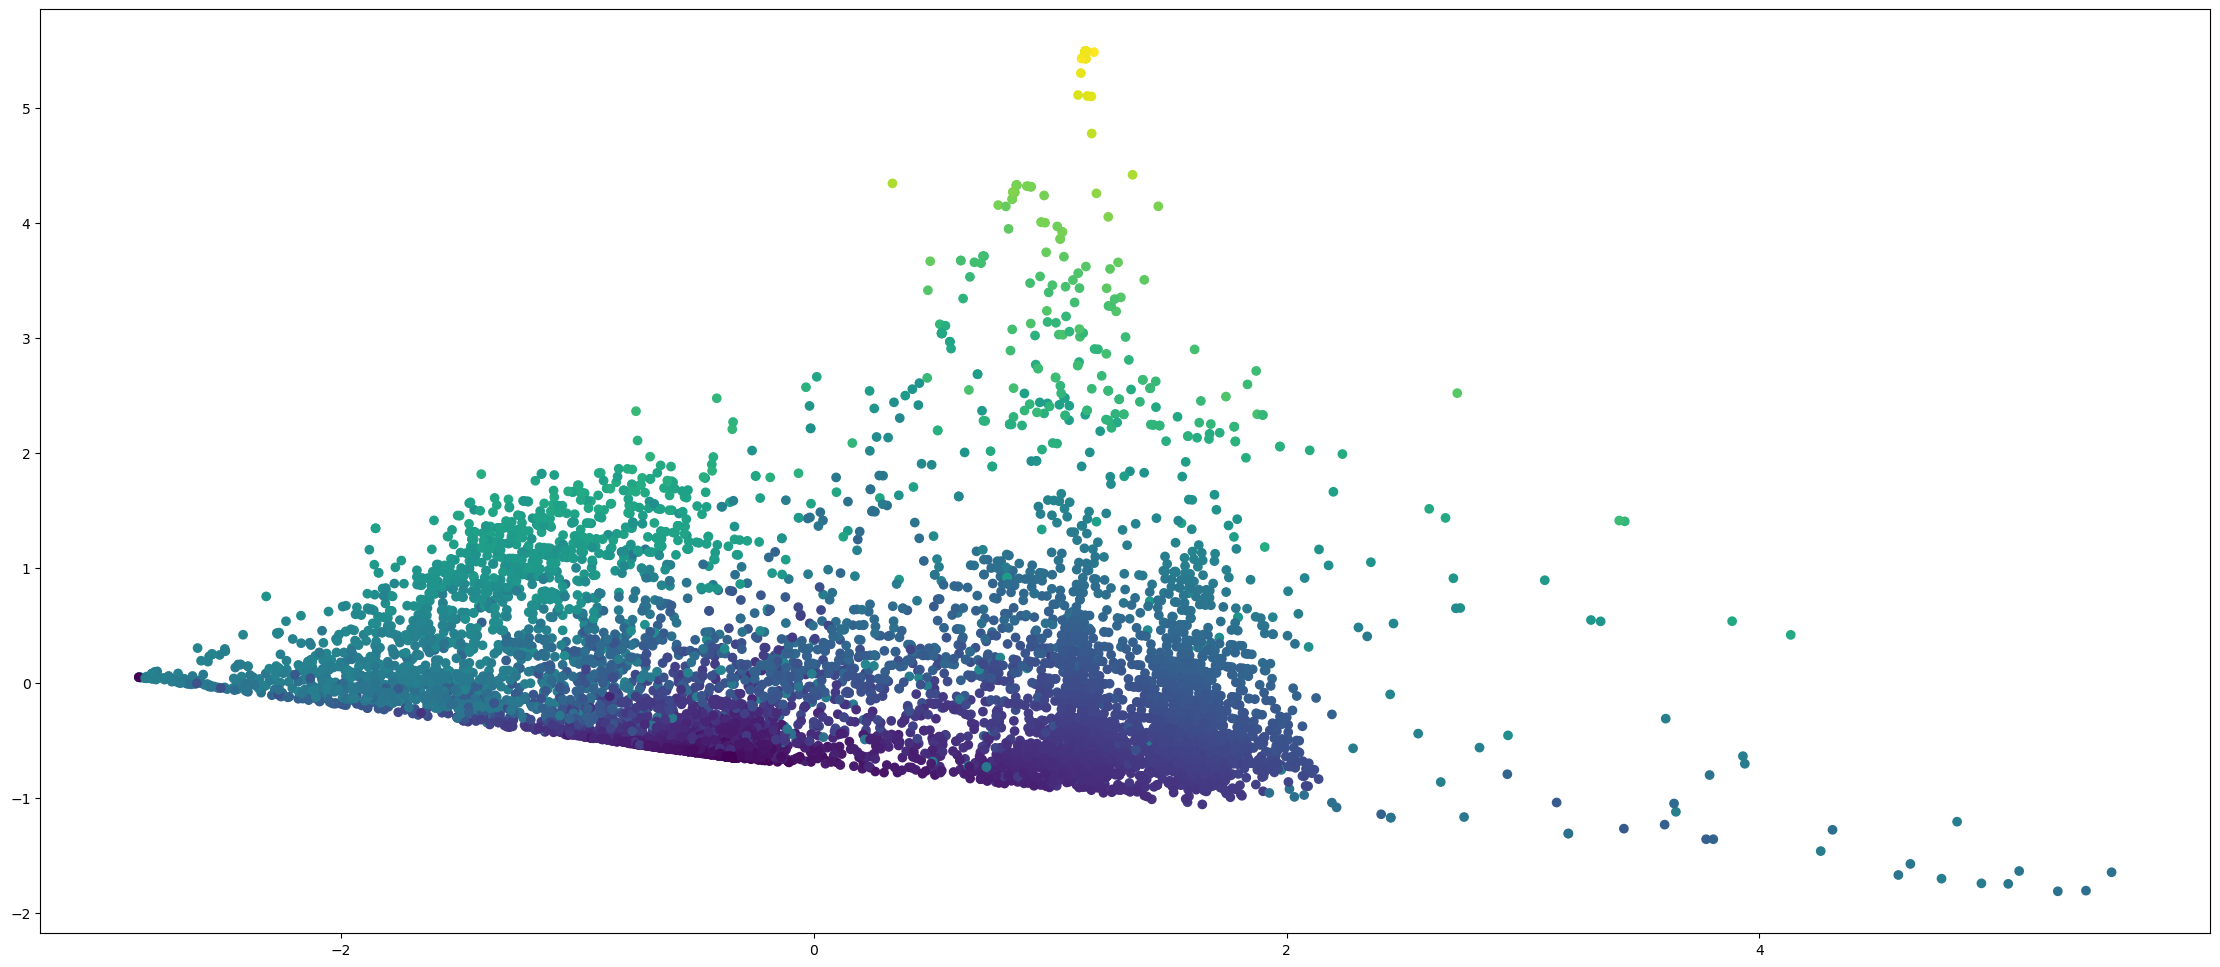

In [28]:
plot_pca(df_macro_general)

<div style="background-color: #e6eef7; padding:30px;">
Fakt, że punkty poszczególnego koloru są blisko siebie oznacza, że zmienne dobrze opisują zmienną opisywaną
</div>

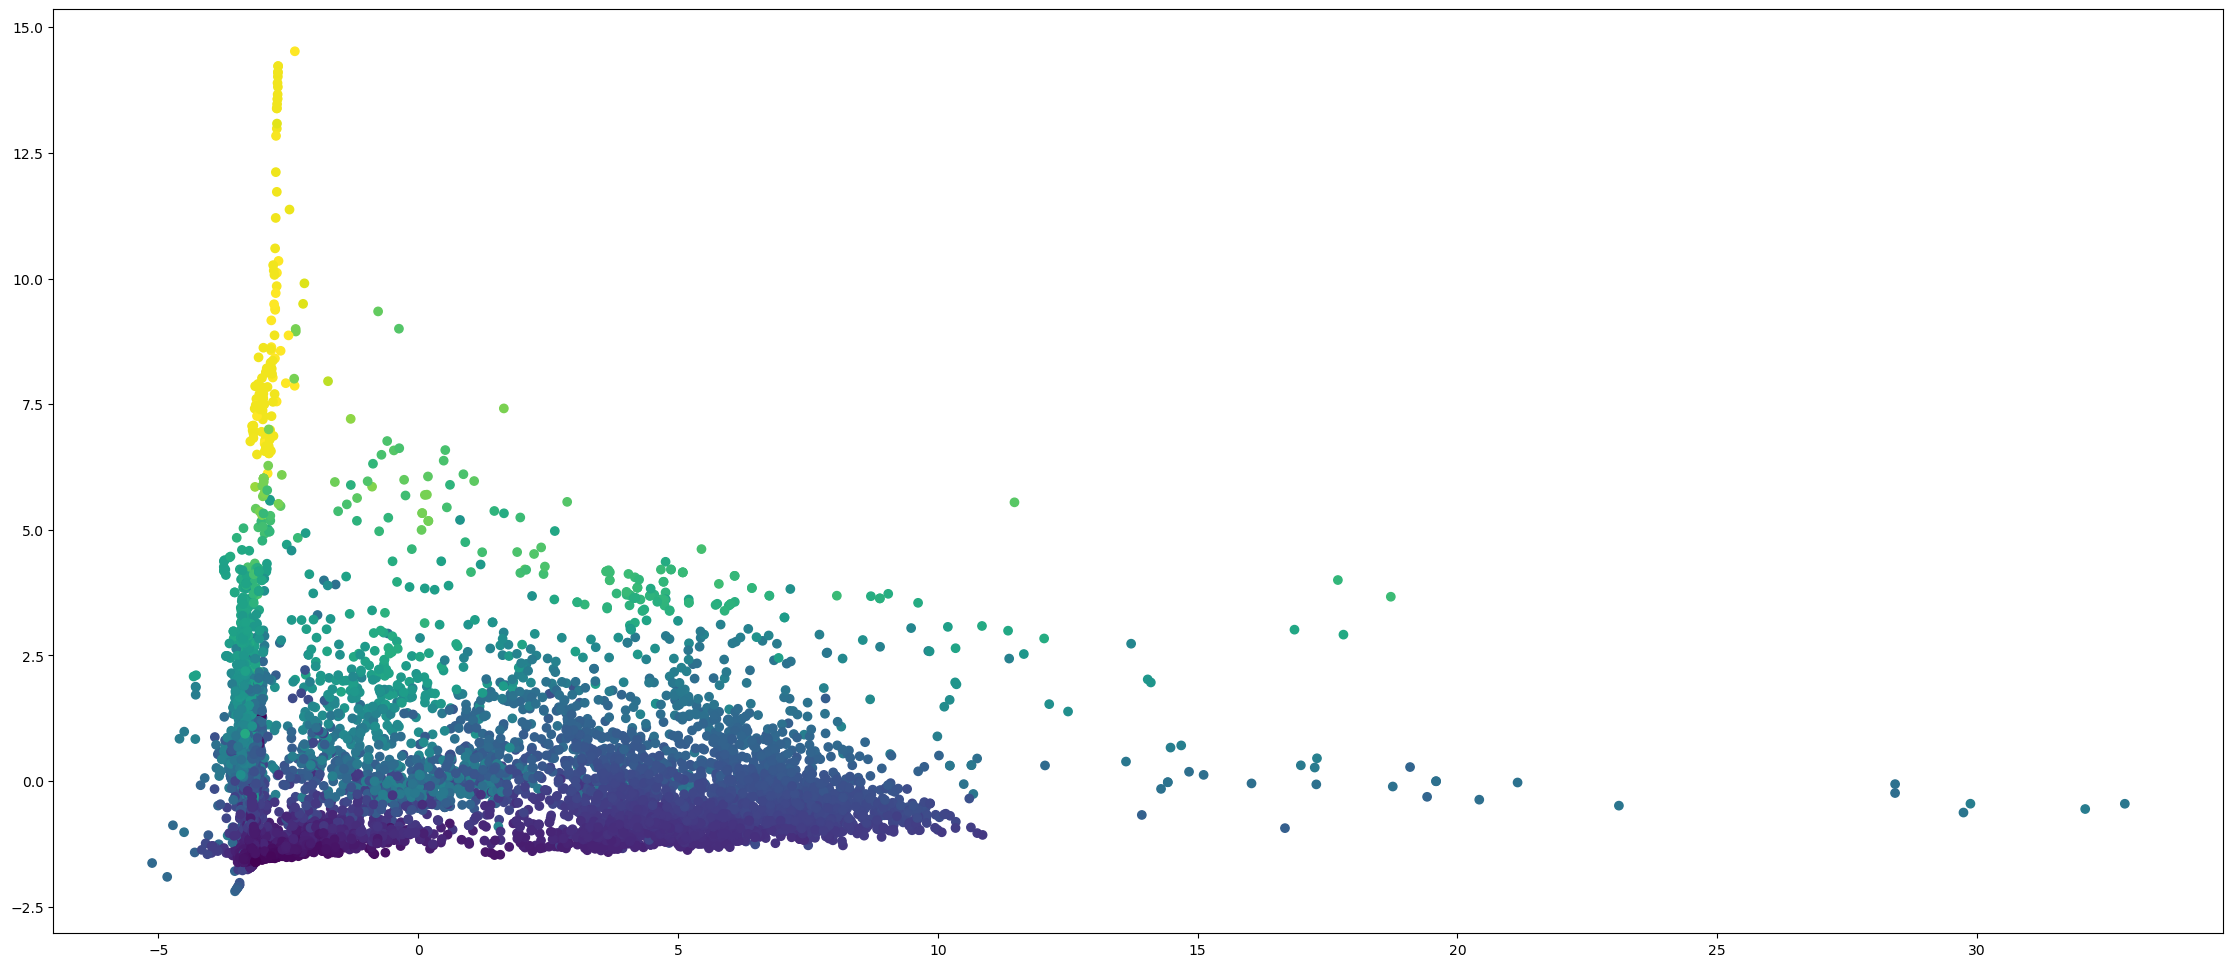

In [29]:
plot_pca(df_macro_specific)

<div style="background-color: #e6eef7; padding:30px;">
Te cechy też dobrze opisują zmienną opisywaną, duża ilość cech z tego zbioru sumuje się na cechy ze zbioru macro_general
</div>

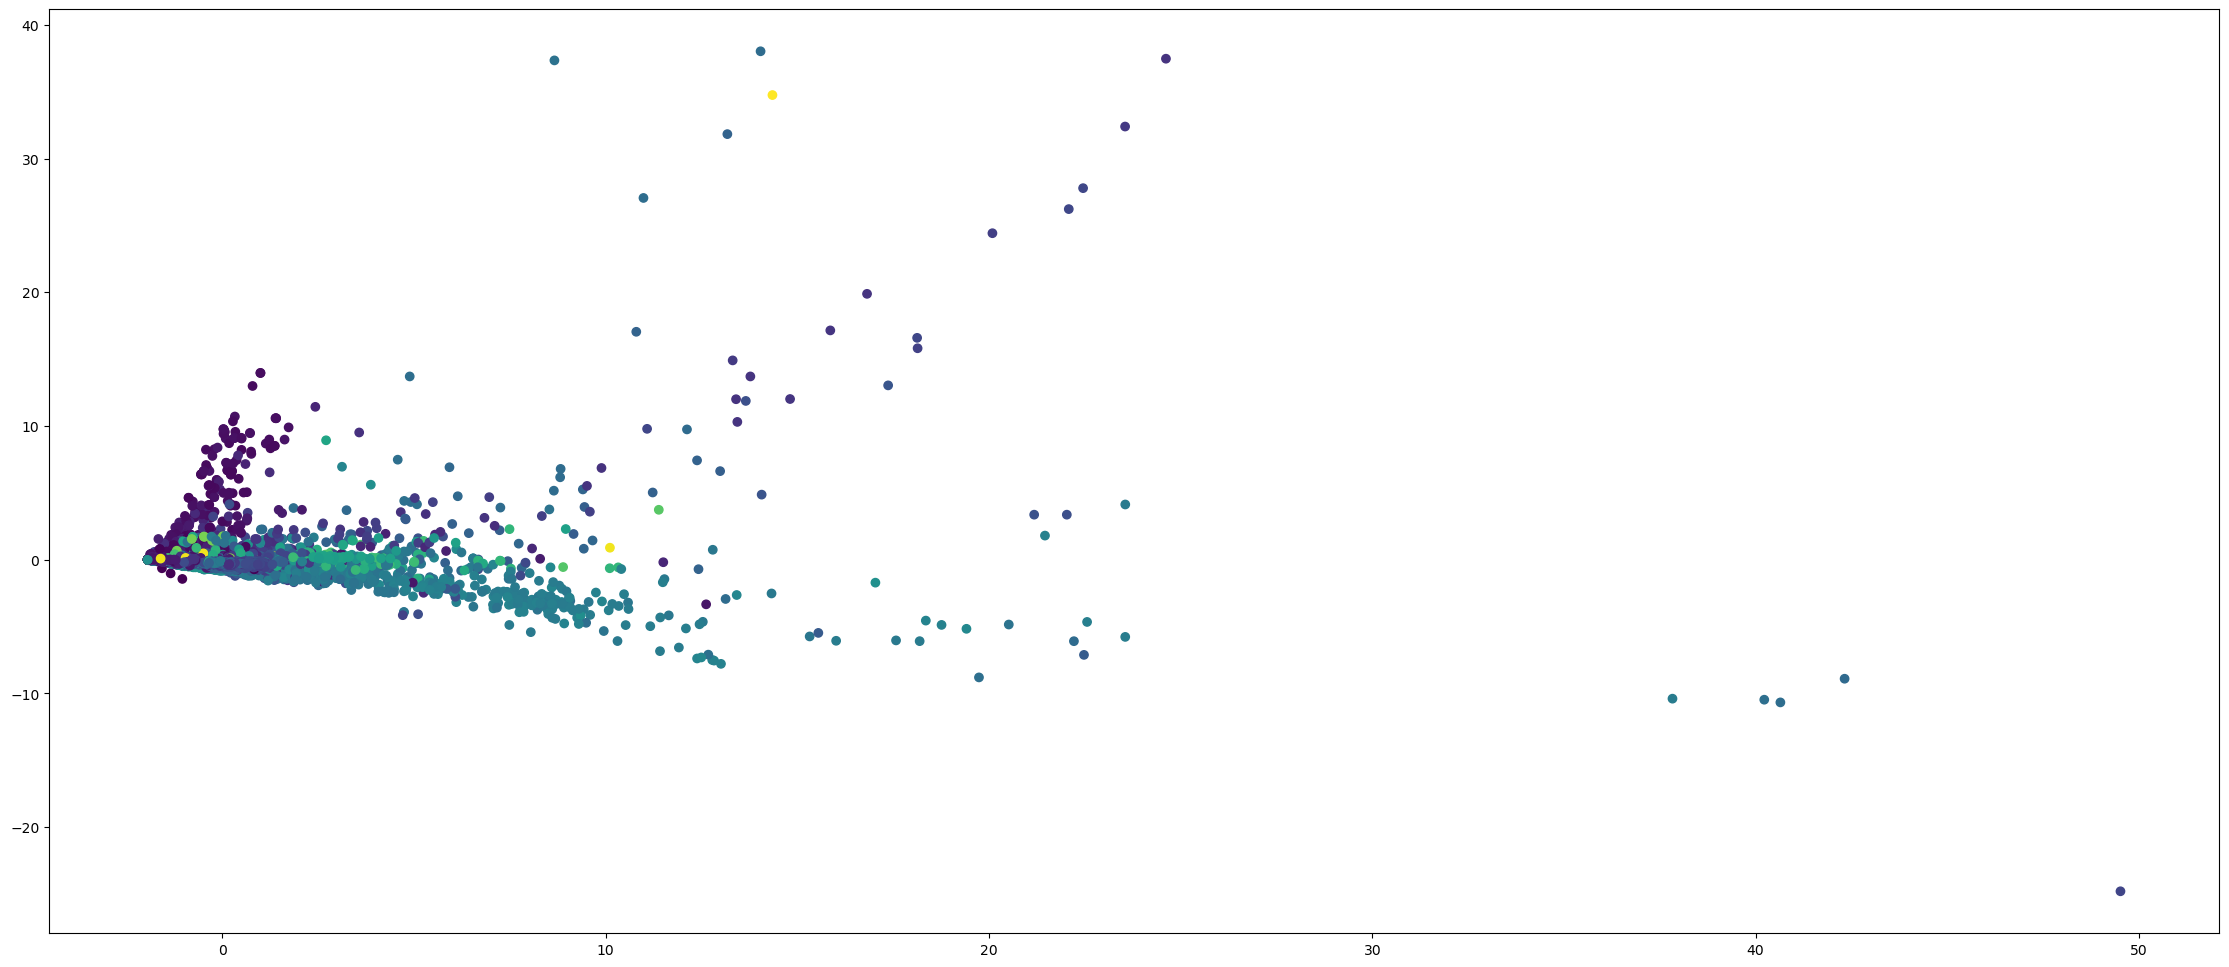

In [30]:
plot_pca(df_micro)

<div style="background-color: #e6eef7; padding:30px;">
Punkty jednego koloru nie są zgrupowane, ale też nie są losowo rozrzucone, więc zależność regresji może być znaleziona niekoniecznie w regresji liniowej, ale np. regresji wielomianowej
</div>

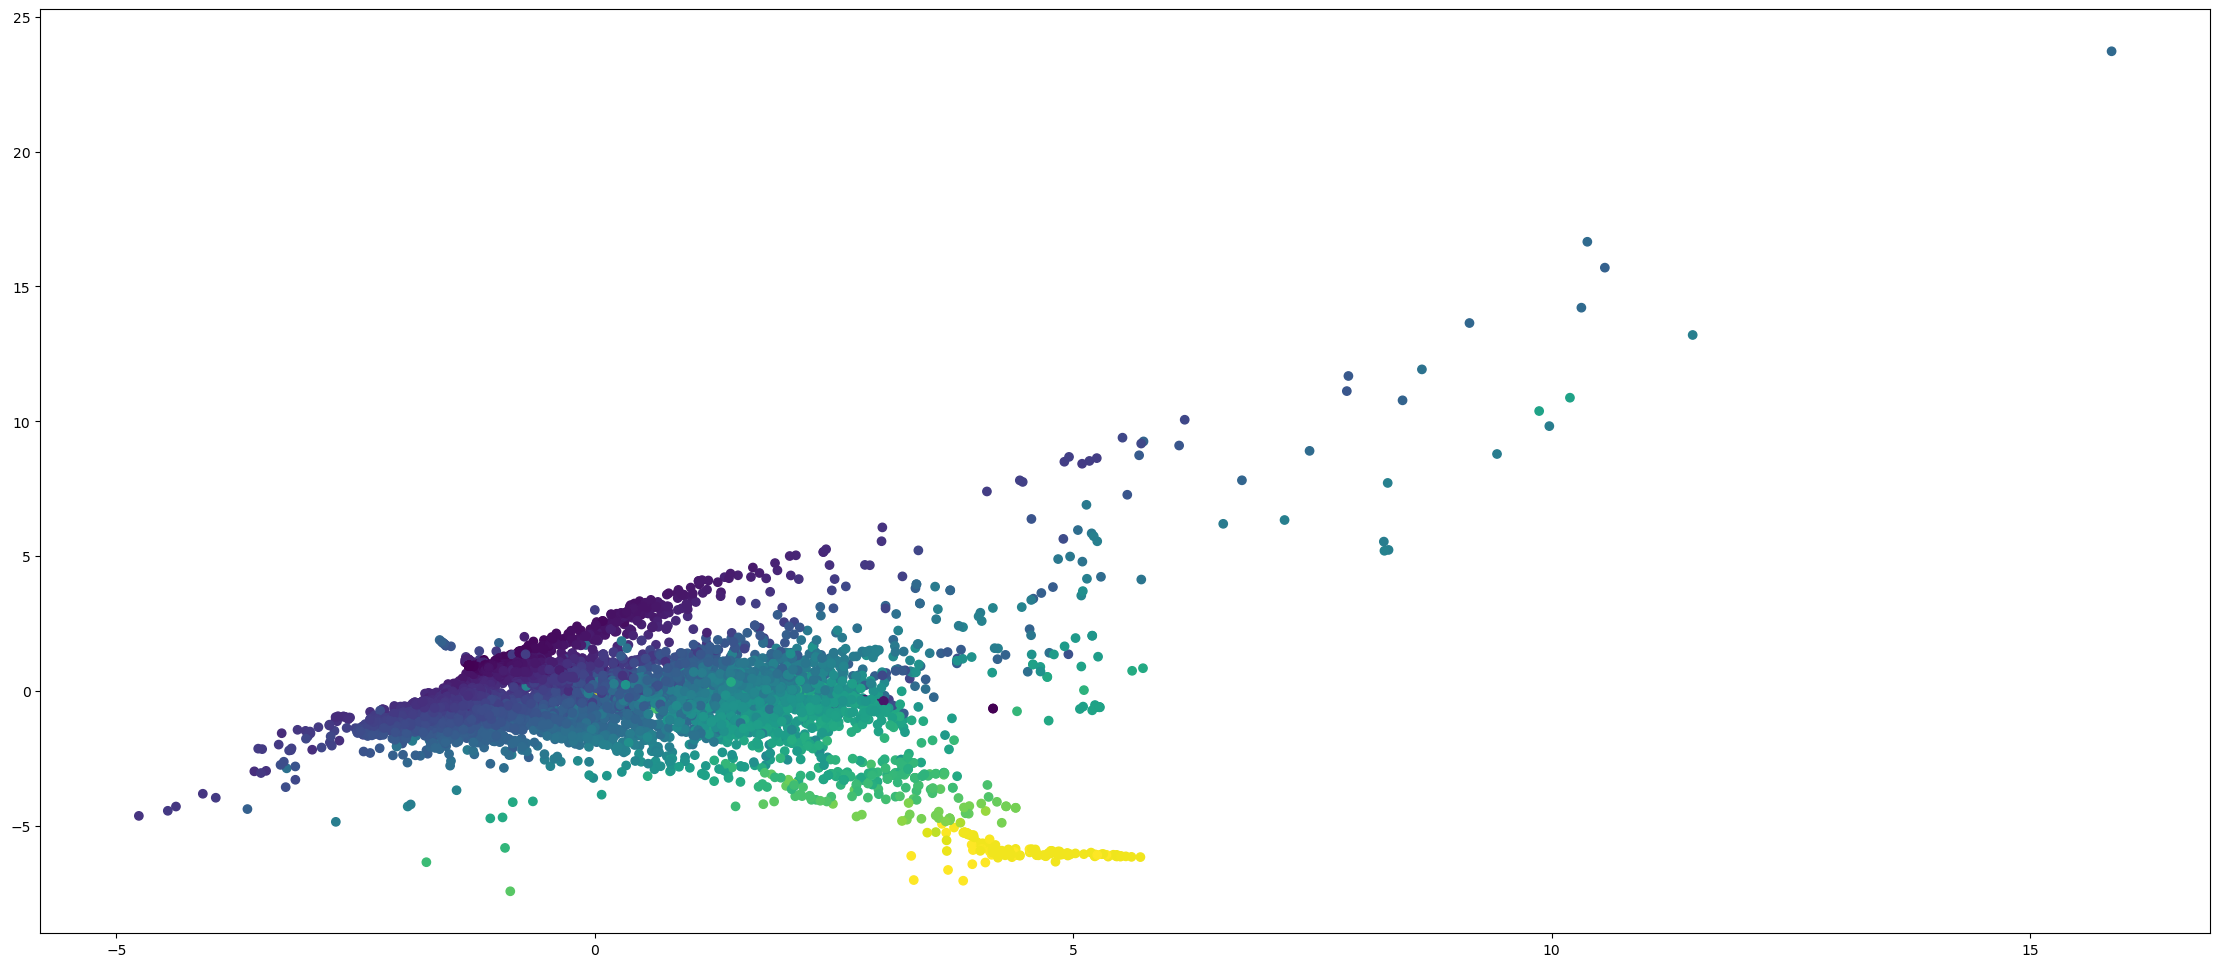

In [31]:
plot_pca(df_bez_korelacji)

In [32]:
def plot_tsne(df):
    scaled_data = preprocessing.scale(df.iloc[:, 2:])
    
    tsne = TSNE(n_components=2, random_state=42)
    tsne_result = tsne.fit_transform(scaled_data)

    plt.figure(figsize=(28, 12))
    plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=df.iloc[:, 1].values)
    plt.show()

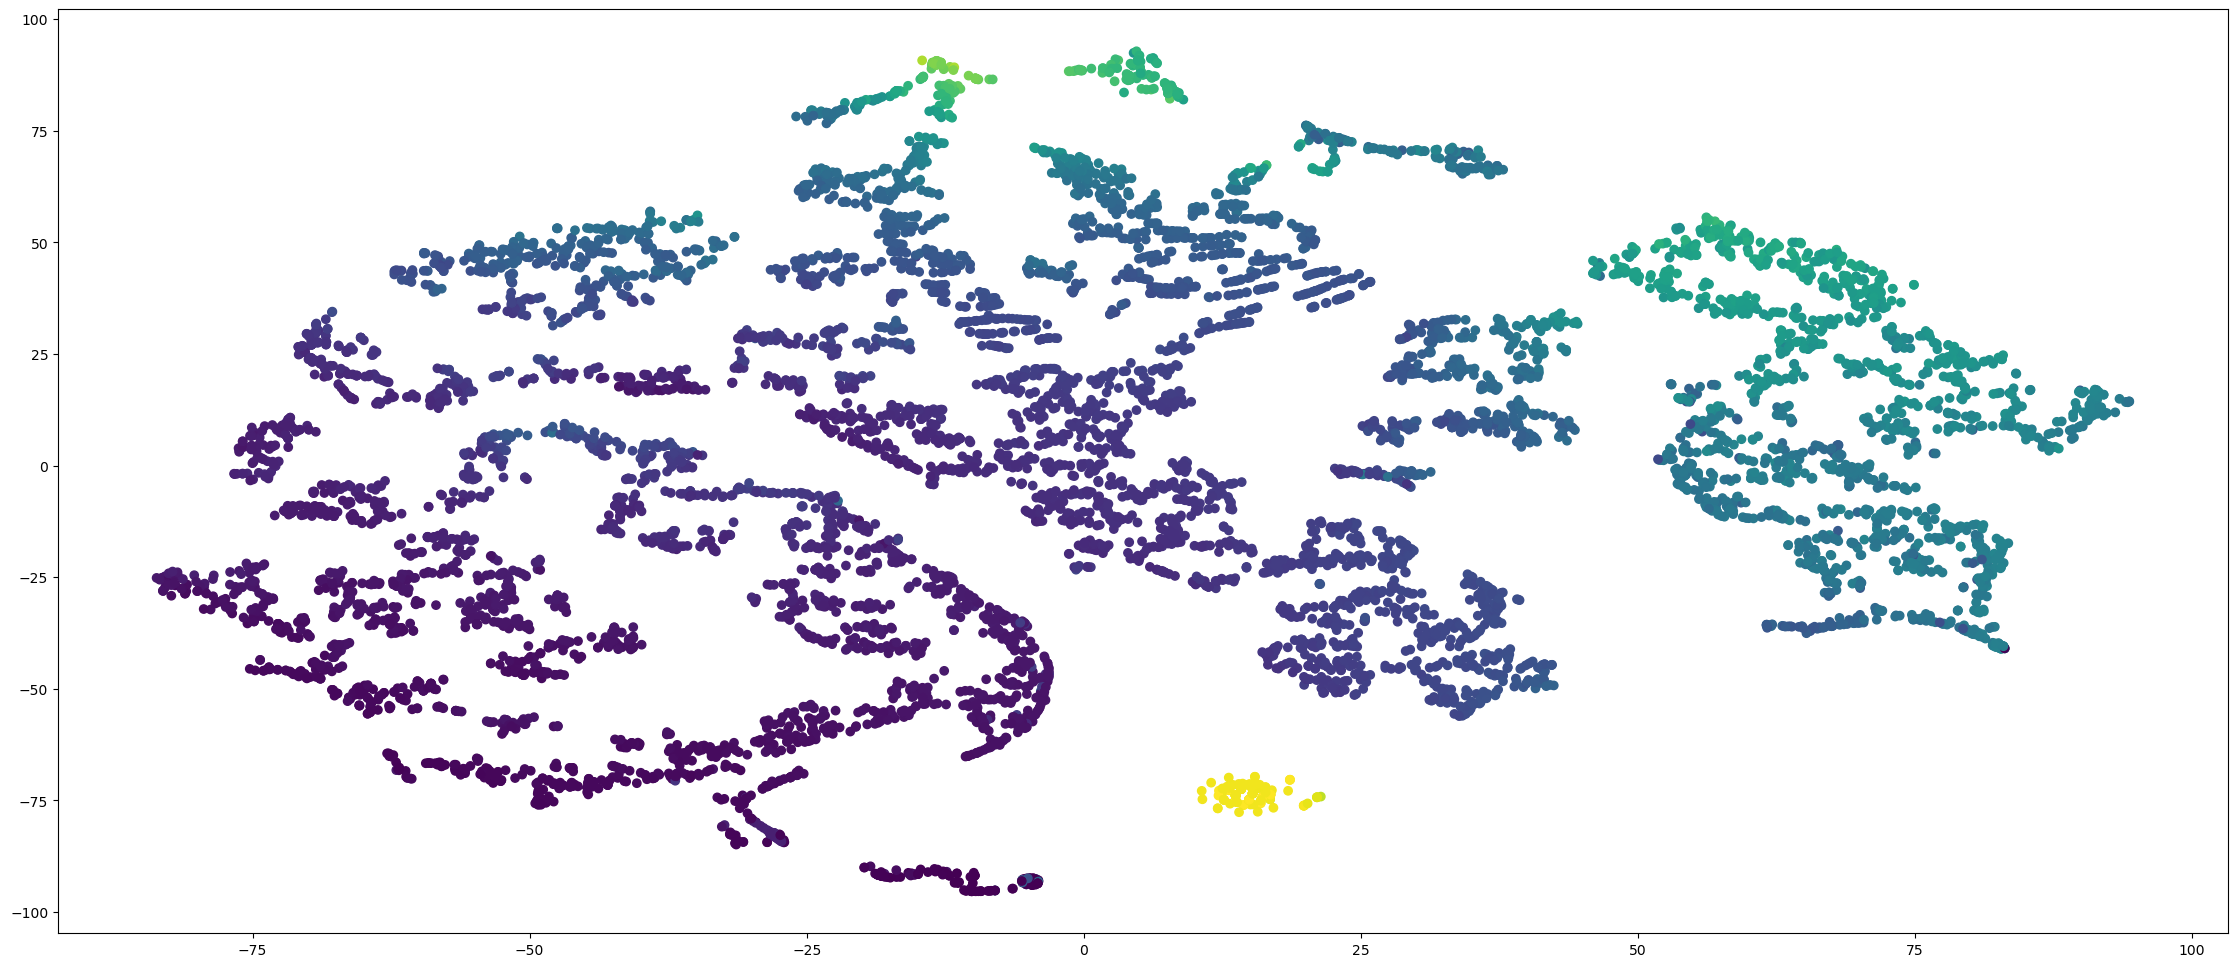

In [33]:
plot_tsne(df_macro_general)

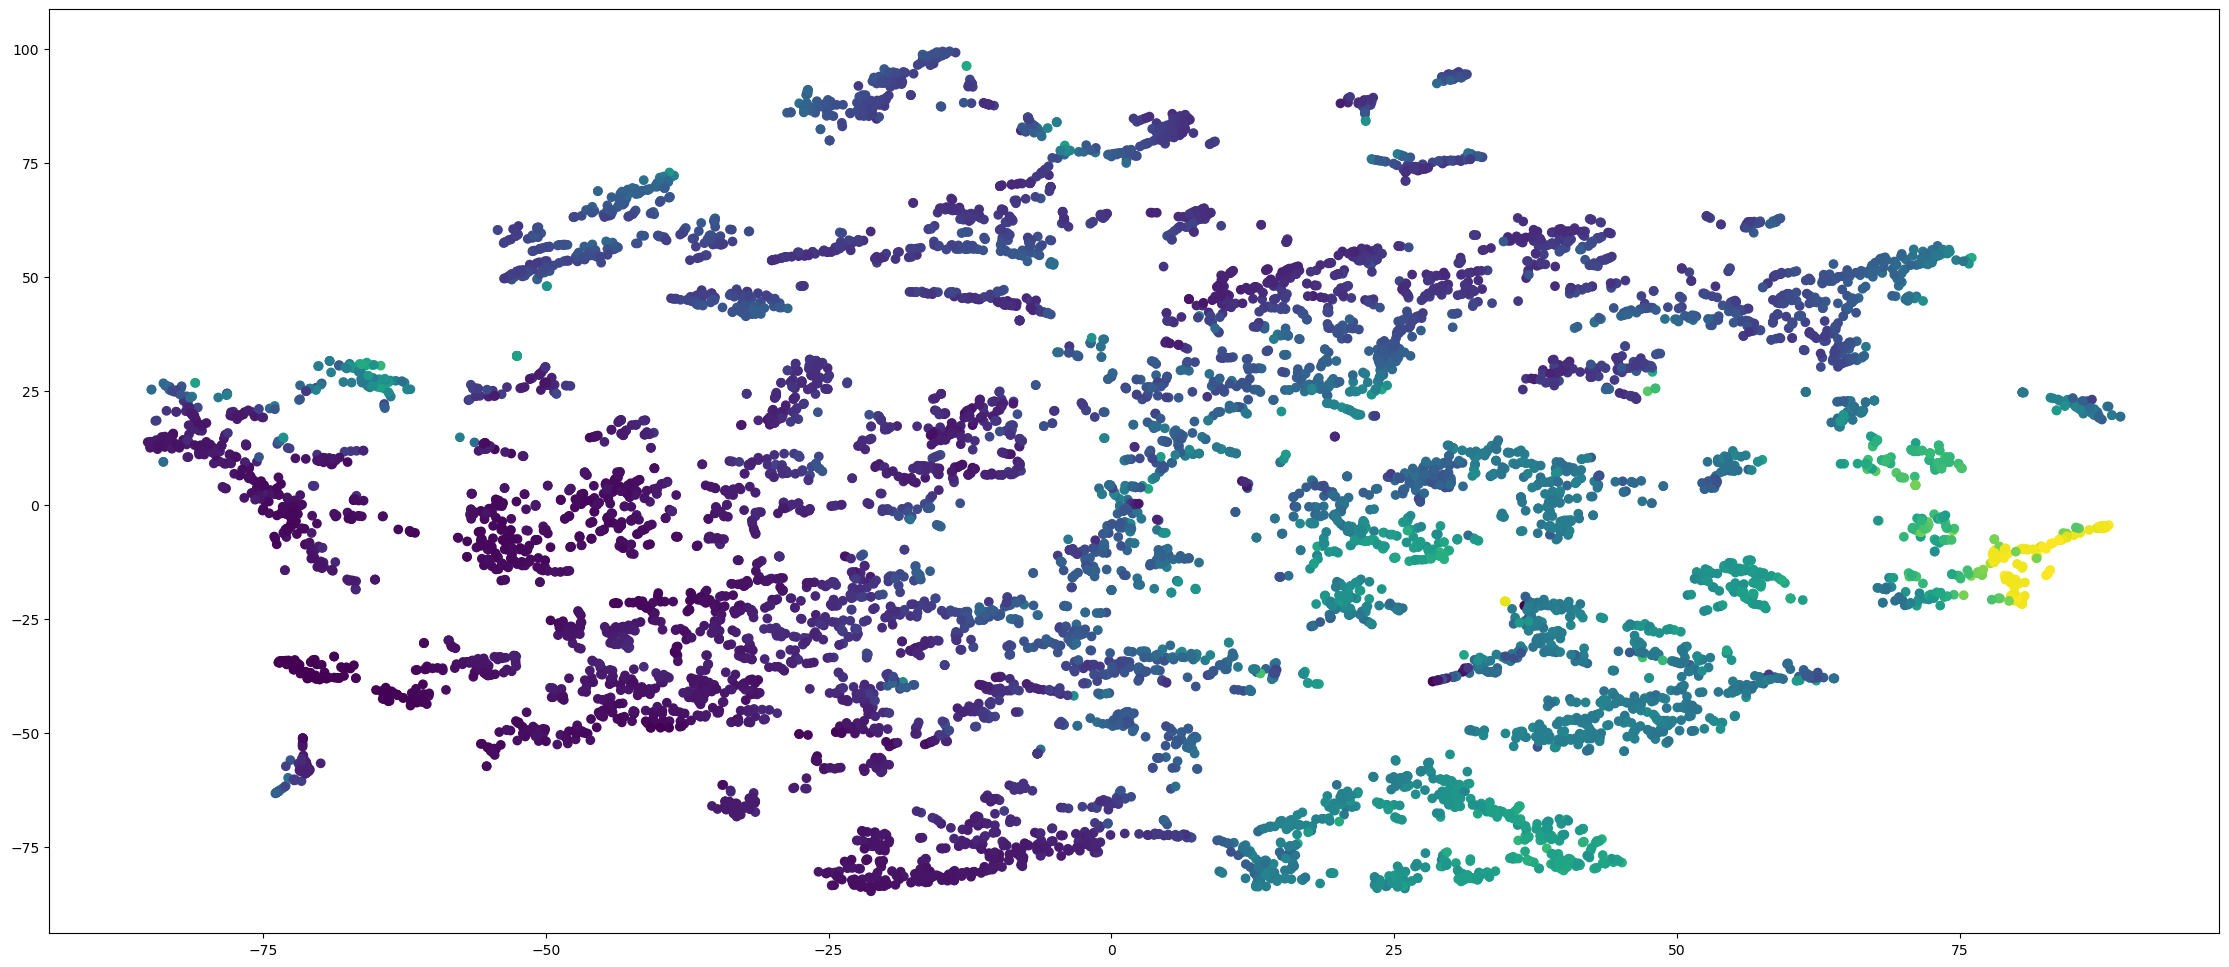

In [34]:
plot_tsne(df_macro_specific)

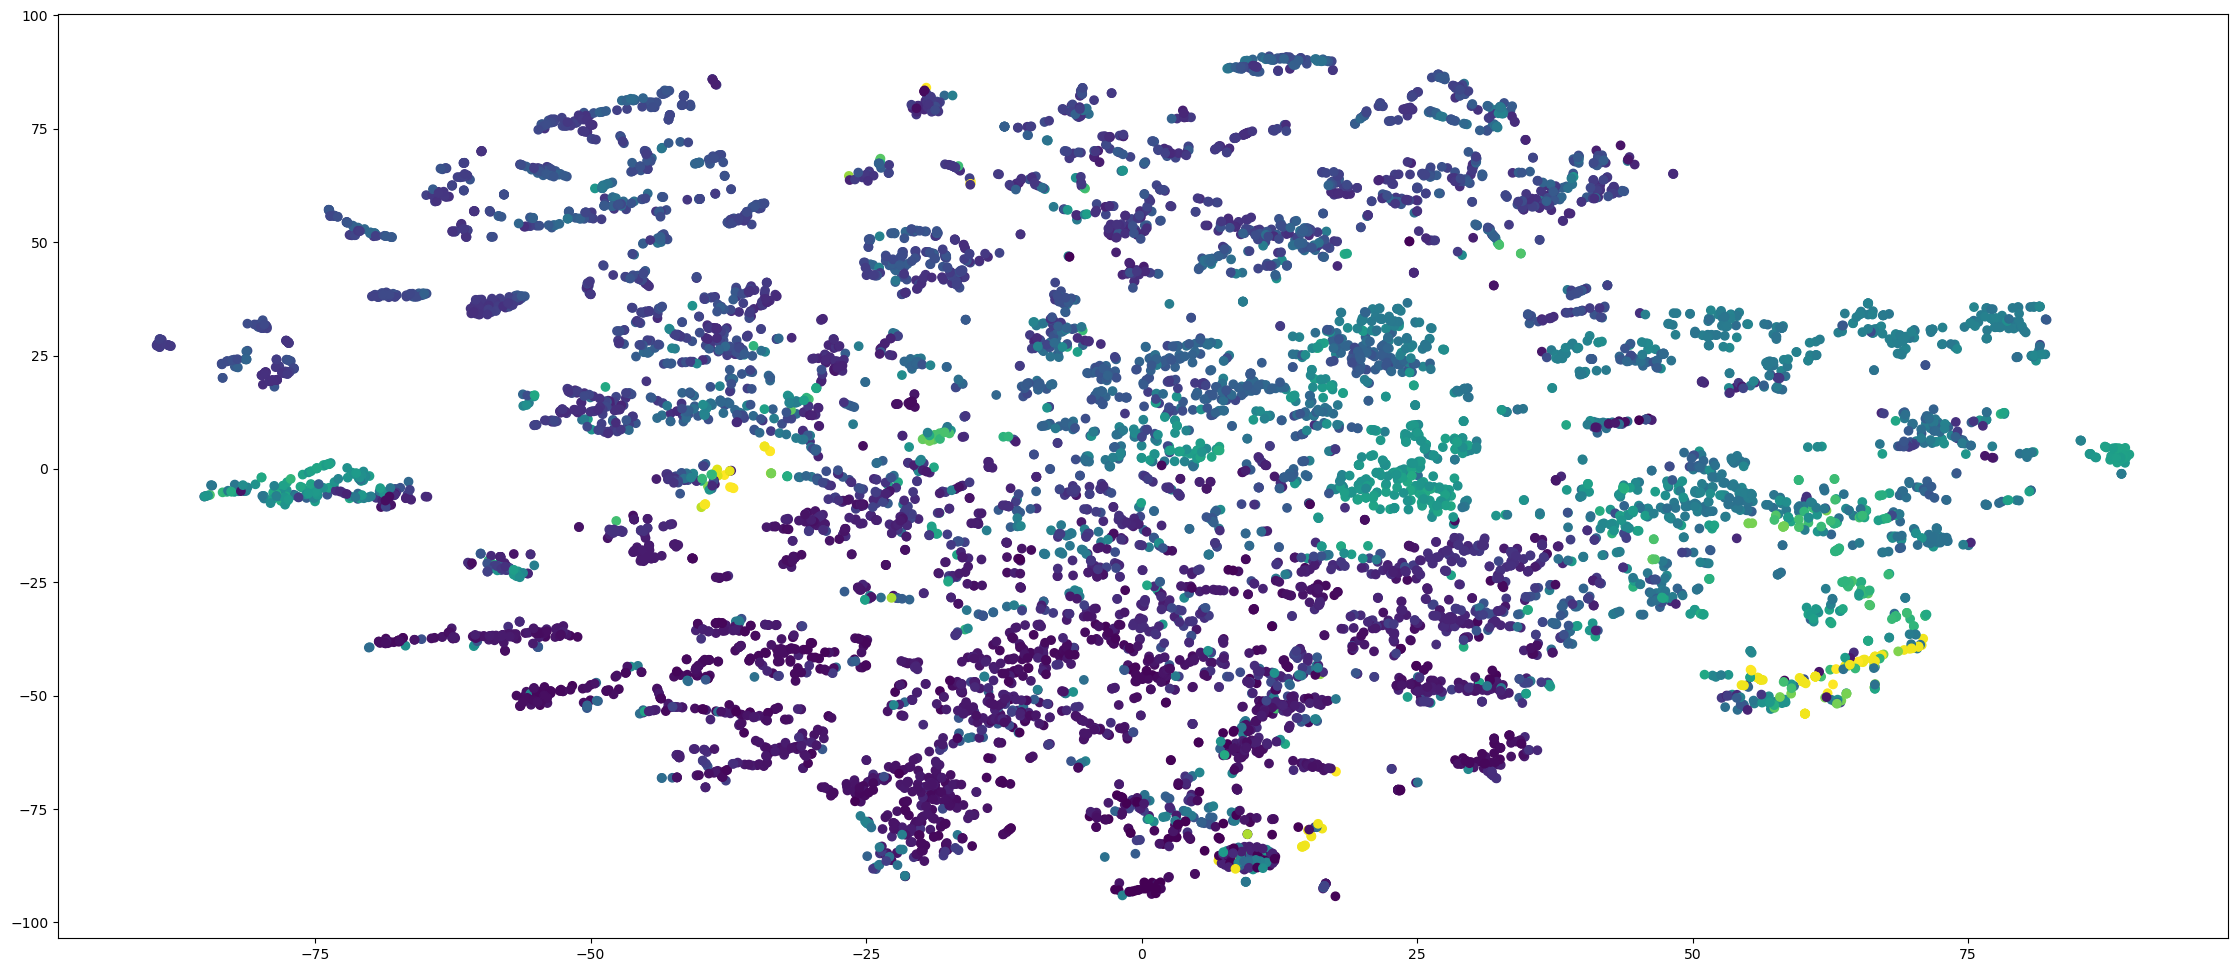

In [35]:
plot_tsne(df_micro)

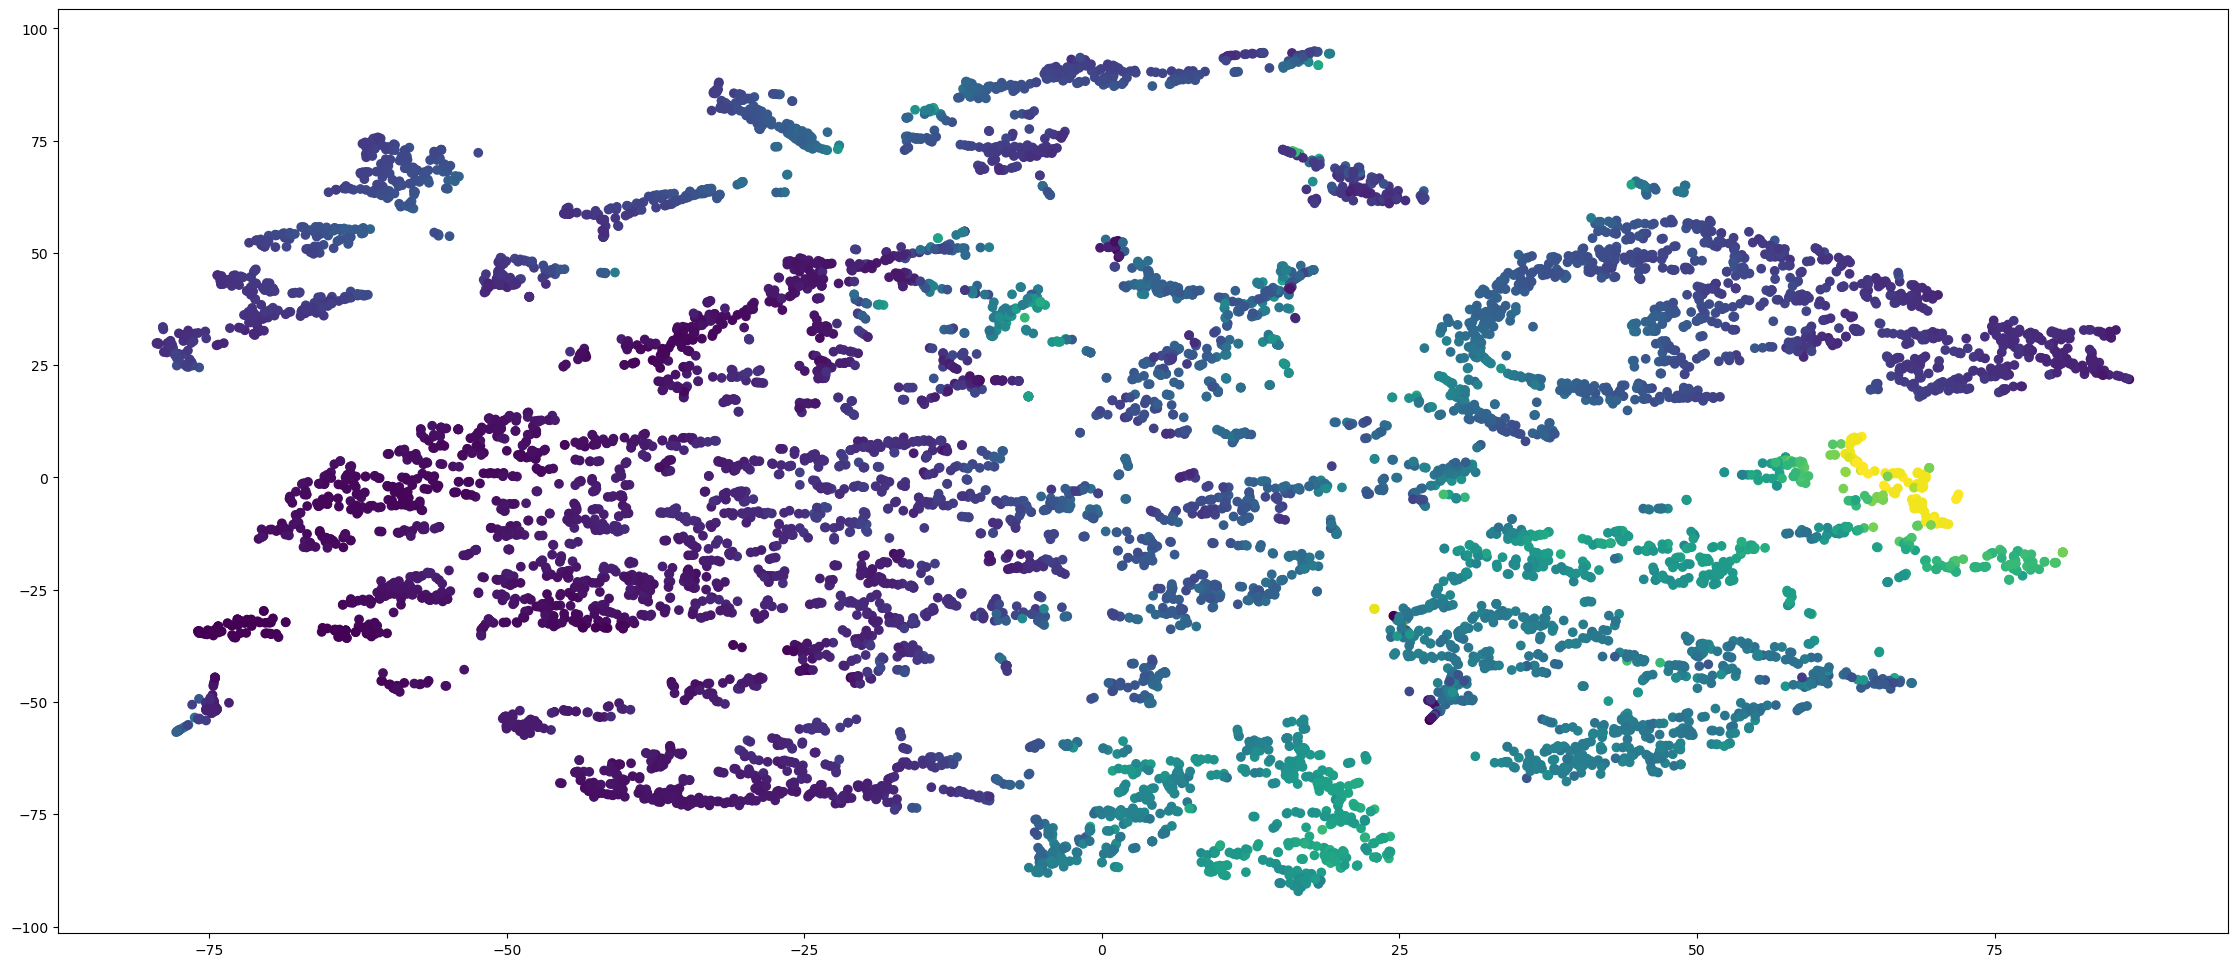

In [36]:
plot_tsne(df_bez_korelacji)

<div style="background-color: #e6eef7; padding:30px;">
Wnioski z wykresów tsne takie same jak z wykresów pca
</div>

<div style="background-color: #e6eef7; padding:30px;">

## Podsumowanie

### Hipotezy:
    1. Kaloryczność produktu jest zależna w sposób liniowy od makroskładników (ogólnych).
    
    2. Kaloryczność produktu jest zależna w sposób liniowy od wyszczegółowionych makroskładników (nie będziemy się zajmować tym problemem w dalszej części).
    
    3. Kaloryczność produktu jest zależna w sposób nieliniowy od mikroskładników. Niemniej dopasowanie liniowe może okazać się do pewnego stopnia skuteczne.
    
    
Przypuszcza się, że regresja liniowa dla zbioru *df_macro_general* uwzględniająca wszystkie zmienne z atrybutem *calories* jako zmienną opisywaną będzie bardzo skuteczna i będzie mieć znikomy błąd dopasowania. 
    
Problem dopasowania modelu regresji będzie obszerniejszy dla zbioru *df_micro*. Niektóre z cech zostaną wyeliminowane ze względu na niewielką korelację z wynikiem. Dane powinny być znormalizowane, ponieważ niektóre z próbek mają wartości różniące się o kilka rzędów wielkości. Rozważa się zamianę niektórych cech na ich zlogarytmowane / spierwiastkowane wersje. Przeprowadzona będzie próba dopasowania modelu liniowego, jednak z dużym prawdopodobieństwem konieczna będzie zamiana modelu na nieliniowy w celu uzyskania przyzwoitej jakości. 
</div>

<div style="background-color: #e4ede6; padding:30px; text-align: center;">
    
# Część 3 - Opracowanie modelu regresji
##### Inga Maziarz, Krzysztof Budzyński

</div>

<div style="background-color: #e4ede6; padding:30px; text-align: center;">
    
# Zbiór makroskładników 
    
</div>

In [37]:
# zbiór macro 
cal_macro = df_macro_general['calories']
macro = df_macro_general.iloc[:, 2:]

macro_train, macro_test, cal_macro_train, cal_macro_test = train_test_split(macro, cal_macro, test_size=0.3, random_state=42)

<div style="background-color: #e4ede6; padding:30px;">
Dopasowywanie regresji odbywa się z gotową hipotezą: kaloryczność produktu jest funkcją liniową makroskładników. Jako że powszechnie wiadomo, że 1g tłuszczu zawiera ok. 9 kcal, a 1g białka i węglowodanów po ok. 4 kcal, to funkcja zależności kaloryczności od makroskładników będzie w przybliżeniu równa: 
$$
calories = 9(total\_fat\_g) + 4(protein\_g) + 4(carbohydrate\_g)
$$
    
Dopasowanie regresji potwierdziło hipotezę. Otrzymane współczynniki wynoszą [8.8, 3.97, 3.78]. Średni błąd bezwzględny uczenia i testowania wynosi około 8 kalorii. Jest to znikomy błąd; patrząc, że średnia wartość kaloryczności to 226, to błąd predykcji wynosi zaledwie 3%.
</div>

In [40]:
linear_model = LinearRegression()
linear_model.fit(macro_train, cal_macro_train)

macro_train_preds = linear_model.predict(macro_train)
macro_test_preds = linear_model.predict(macro_test)

macro_mae_train = mean_absolute_error(cal_macro_train, macro_train_preds)
macro_mse_train = mean_squared_error(cal_macro_train, macro_train_preds)
macro_mae_test = mean_absolute_error(cal_macro_test, macro_test_preds)
macro_mse_test = mean_squared_error(cal_macro_test, macro_test_preds)

print(f"MAE uczenia: {macro_mae_train}")
print(f"MSE uczenia: {macro_mse_train}")
print(f"MAE testowania: {macro_mae_test}")
print(f"MSE testowania: {macro_mse_test}")

print(f"Współczynniki: {linear_model.coef_}")

MAE uczenia: 8.211280506498552
MSE uczenia: 319.90718565812733
MAE testowania: 7.93291809433631
MSE testowania: 260.30699940985227
Współczynniki: [8.80891619 3.96511207 3.77921165]


<div style="background-color: #e4ede6; padding:30px; text-align: center;">
    
# Zbiór mikroskładników
    
</div>

<div style="background-color: #e4ede6; padding:30px;">
Postawiona hipoteza brzmiała, że kaloryczność do pewnego stopnia zależy od mikroskładników w sposób nieliniowy i w niewielkim stopniu w sposób liniowy.

Do zbioru posiadającego wszystkie cechy dopasowano regresję liniową (MSE uczenia: 21296, MSE walidacji: 21082) i kwadratową (MSE uczenia: 12096, MSE walidacji: 412803). Próba dopasowania regresji o wyższym stopniu nie została przeprowadzona ze względu na konieczność dopasowania bardzo dużej liczby współczynników i niewystarczającą dostępną moc obliczeniową. Zdecydowano się na model kwadratowy, ponieważ tam błąd uczenia był najmniejszy.
    
Aby zmniejszyć wariancję modelu, zdecydowano się na selekcję cech. W tym zbiorze występują 33 cechy opisujące, co jest stosunkowo dużą liczbą. Początkowo odrzucono cechy o małym zróżnicowaniu - te, które w 90% mają wartości równe zeru. Po tej selekcji zostało 29 cech. 
    
Dodatkowo, po analizie macierzy korelacji cech, sposród danych dwóch cech opisujących, których bezwzględny współczynnik korelacji był wysoki ( > 0.7), wybrano tylko jedną z nich. Po selekcji 25 pozostało cech.
</div>

In [41]:
def model_learn(deg, x_train, x_valid, y_train, y_valid):
    poly_model = PolynomialFeatures(degree=deg)

    poly_x_train = poly_model.fit_transform(x_train)
    poly_x_valid = poly_model.fit_transform(x_valid)

    feature_names = poly_model.get_feature_names_out()

    regression_model = LinearRegression()
    regression_model.fit(poly_x_train, y_train)

    pred_train = regression_model.predict(poly_x_train)
    pred_valid = regression_model.predict(poly_x_valid)

    error_train = mse(y_train, pred_train) #błąd uczenia
    error_valid = mse(y_valid, pred_valid) #błąd walidacji

    features_and_coefs = list(zip(feature_names, regression_model.coef_))

    print(f"Błąd uczenia {error_train}")
    print(f"Błąd walidacji {error_valid}")
    print(f"Zmienne modelu {feature_names}")
    print(f"Współczynniki {regression_model.coef_}")
    
    return features_and_coefs

In [42]:
#dopasowanie modelu na wszystkich 33 cechach - funkcja liniowa i kwadratowa
def mse(y, preds):
    return np.mean((y - preds)**2)

micro = df_micro.iloc[:, 2:]
cal_micro = df_micro.iloc[:, 1]

micro_train, micro_temp, cal_micro_train, cal_micro_temp = train_test_split(micro, cal_micro, test_size=0.3, random_state=42)
micro_valid, micro_test, cal_micro_valid, cal_micro_test = train_test_split(micro_temp, cal_micro_temp, test_size=0.67, random_state=42)

model_learn(1, micro_train, micro_valid, cal_micro_train, cal_micro_valid)
model_learn(2, micro_train, micro_valid, cal_micro_train, cal_micro_valid)

Błąd uczenia 21295.9625638453
Błąd walidacji 21082.014515897237
Zmienne modelu ['1' 'cholesterol_mg' 'sodium_mg' 'choline_mg' 'folate_mcg'
 'folic_acid_mcg' 'niacin_mg' 'pantothenic_acid_mg' 'riboflavin_mg'
 'thiamin_mg' 'vitamin_a_ IU' 'vitamin_a_rae_mcg' 'carotene_alpha_mcg'
 'carotene_beta_mcg' 'cryptoxanthin_beta_mcg' 'lutein_zeaxanthin_mcg'
 'vitamin_b12_mcg' 'vitamin_b6_mg' 'vitamin_c_mg' 'vitamin_d_ IU'
 'vitamin_e_mg' 'tocopherol_alpha_mg' 'vitamin_k_mcg' 'calcium_mg'
 'copper_mg' 'irom_mg' 'magnesium_mg' 'manganese_mg' 'phosphorous_mg'
 'potassium_mg' 'selenium_mcg' 'zink_mg' 'caffeine_mg' 'theobromine_mg']
Współczynniki [ 1.61916699e-12  1.16318824e-01  2.91848533e-03  3.06083679e-02
  1.38085287e-01 -4.21352789e-02  6.30517986e+00 -2.53948912e+01
  5.92622239e+01  3.74031048e+01 -9.31467563e-04  5.30888519e-04
 -3.34213756e-02  2.20958229e-04 -2.81635057e-02 -1.77038212e-02
 -5.02375224e+00 -8.61583937e+01 -9.09035464e-02  7.25870715e-02
  9.45975819e+00  9.45975819e+00 -3.1

[('1', 2.147585736212019e-06),
 ('cholesterol_mg', 1.2249412633263739),
 ('sodium_mg', 0.007145977650313239),
 ('choline_mg', -0.8414502237284576),
 ('folate_mcg', 0.32063546610616456),
 ('folic_acid_mcg', -0.07512109279645195),
 ('niacin_mg', 24.54081508779542),
 ('pantothenic_acid_mg', -96.54013393693259),
 ('riboflavin_mg', -1.0670429968876014),
 ('thiamin_mg', 203.1822922602377),
 ('vitamin_a_ IU', -0.037117837233863846),
 ('vitamin_a_rae_mcg', 0.13197581775189293),
 ('carotene_alpha_mcg', 0.01291755611740551),
 ('carotene_beta_mcg', -0.030336335816272875),
 ('cryptoxanthin_beta_mcg', -0.2510925044918288),
 ('lutein_zeaxanthin_mcg', -0.04865138065959277),
 ('vitamin_b12_mcg', -20.981430178067672),
 ('vitamin_b6_mg', -164.84512324644706),
 ('vitamin_c_mg', -1.0116559970234609),
 ('vitamin_d_ IU', -0.10695107109039084),
 ('vitamin_e_mg', 31.144830707999372),
 ('tocopherol_alpha_mg', 31.1448307064198),
 ('vitamin_k_mcg', 0.5655671104712097),
 ('calcium_mg', -0.1214768002104342),
 ('co

In [43]:
#odrzucenie cech, gdzie 90% wartości to zera
micro_features = df_micro.iloc[:, 2:].columns

features_to_drop = []
threshold = df_micro.shape[0] * 0.9
for feature in micro_features:
    if (df_micro[feature] == 0).sum() > threshold:
        features_to_drop.append(feature)
        
print(f"Cechy odrzucone ze względu na dużą liczbę zerowych wartości: {features_to_drop}")

Cechy odrzucone ze względu na dużą liczbę zerowych wartości: ['carotene_alpha_mcg', 'cryptoxanthin_beta_mcg', 'caffeine_mg', 'theobromine_mg']


In [44]:
#wybór jednej cechy spośród pary wysoko skorelowanych cech
highly_correlated_pairs = (corr_micro.abs() > 0.7) & (corr_micro.abs() < 1.0)
highly_correlated_pairs = highly_correlated_pairs[(highly_correlated_pairs).any(axis=0)]
highly_correlated_pairs = highly_correlated_pairs.T
highly_correlated_pairs = highly_correlated_pairs[(highly_correlated_pairs).any(axis=1)]
highly_correlated_pairs = highly_correlated_pairs.stack()[highly_correlated_pairs.stack() == True].reset_index()

highly_correlated_pairs = list(zip(highly_correlated_pairs['level_0'], highly_correlated_pairs['level_1']))
highly_correlated_pairs = list(set(map(frozenset, highly_correlated_pairs)))
highly_correlated_pairs = [tuple(pair) for pair in highly_correlated_pairs]
print(f"Wysoko skorelowane pary cech: {highly_correlated_pairs}")

another_features_to_drop = [x[1] for x in highly_correlated_pairs]
print(f"\n\n Odrzucam cechy: {another_features_to_drop}")

Wysoko skorelowane pary cech: [('folate_mcg', 'folic_acid_mcg'), ('niacin_mg', 'riboflavin_mg'), ('vitamin_a_ IU', 'vitamin_a_rae_mcg'), ('vitamin_b6_mg', 'niacin_mg')]


 Odrzucam cechy: ['folic_acid_mcg', 'riboflavin_mg', 'vitamin_a_rae_mcg', 'niacin_mg']


In [45]:
#zbiór z 25 cechami opisującymi - po pierwotnej selekcji
features_to_drop.extend(another_features_to_drop)

micro = df_micro.iloc[:, 2:].drop(features_to_drop, axis=1)
micro


cholesterol_mg  sodium_mg  choline_mg  folate_mcg  pantothenic_acid_mg  \
0                0.0        9.0         0.4         0.0                0.000   
1                0.0        0.0        40.5        22.0                0.863   
2                0.0        2.0         6.9        22.0                0.281   
3                0.0       12.0        13.1         0.0                0.942   
4                1.0       46.0         7.7         4.0                0.224   
...              ...        ...         ...         ...                  ...   
8784            62.0       54.0        64.5         4.0                0.356   
8785           109.0       50.0         0.0         0.0                0.580   
8786            78.0       39.0         0.0         1.0                0.520   
8787            60.0       53.0        64.2         4.0                0.355   
8788            60.0       53.0        64.2         4.0                0.355   

      thiamin_mg  vitamin_a_ IU  carotene_beta_mcg  lutein_zeaxanthin_mcg  \
0          0.000            0.0                0.0                    0.0   
1          0.660           56.0               29.0                   17.0   
2          0.039           23.0               14.0                   36.0   
3          0.390            9.0                5.0                   66.0   
4          0.027           46.0                1.0                    7.0   
...          ...            ...                ...                    ...   
8784       0.063           11.0                0.0                    0.0   
8785       0.130            0.0                0.0                    0.0   
8786       0.130            0.0                0.0                    0.0   
8787       0.063            4.0                0.0                    0.0   
8788       0.063            6.0                0.0                    0.0   

      vitamin_b12_mcg  ...  vitamin_k_mcg  calcium_mg  copper_mg  irom_mg  \
0                0.00  ...            0.0         2.0      0.050     0.47   
1                0.00  ...            3.5        70.0      1.200     2.53   
2                0.00  ...            3.5         9.0      0.081     0.23   
3                0.00  ...            1.9       180.0      0.810     7.63   
4                0.13  ...            0.0        54.0      0.028     0.14   
...               ...  ...            ...         ...        ...      ...   
8784             1.64  ...            1.5        13.0      0.048     2.33   
8785             2.95  ...            0.0        13.0      0.114     2.35   
8786             2.42  ...            0.0        13.0      0.083     1.49   
8787             1.84  ...            1.5        13.0      0.042     1.45   
8788             1.84  ...            1.5        13.0      0.042     1.45   

      magnesium_mg  manganese_mg  phosphorous_mg  potassium_mg  selenium_mcg  \
0              3.0         0.053            13.0           3.0           2.8   
1            121.0         4.500           277.0         410.0           3.8   
2             14.0         0.232            24.0         229.0           0.3   
3            184.0         9.240           429.0         427.0           4.4   
4              8.0         0.011            40.0          96.0           1.5   
...            ...           ...             ...           ...           ...   
8784          12.0         0.004           219.0         311.0          22.1   
8785          22.0         0.029           246.0         188.0           2.0   
8786          15.0         0.018           168.0         136.0           1.3   
8787          12.0         0.001           222.0         319.0          22.6   
8788          12.0         0.001           222.0         319.0          22.6   

      zink_mg  
0        0.06  
1        4.53  
2        0.16  
3        3.63  
4        0.48  
...       ...  
8784     3.67  
8785     4.30  
8786     2.39  
8787     3.42  
8788     3.42  

[8789 rows x 25 columns]

<div style="background-color: #e4ede6; padding:30px;">
Do pięciu cech, których rozkład wykazywał największą skośność, dodano do zbioru ich wersję zlogarytmowaną. Wartości równe zeru, które nie mogły być zlogarytmowane, zastąpiono średnią z reszty wartości. Dodatkowo dodano kolumnę z informacją, czy dana wartość była logarytmowalna (wartość 0) czy nie (wartość 1). Kolumnę tę można interpretować również jako "czy wartość była równa zeru". Po tej modyfikacji w zbiorze było 35 cech opisujących.
</div>

In [46]:
#funkcja dodająca do ramki cechę zlogarytmowaną
#wartości, których nie udało się zlogarytmować zastępowane są wartością średnią z reszty rekordów
#dodatkowo dodawana jest kolumna z informacją, czy dana wartość jest logarytmowalna

def add_log_feature(df, feature):
    df[feature + '_log'] = np.log(df[feature][df[feature] != 0])
    df[feature + '_cannot_log'] = df[feature + '_log'].isna().astype(int)
    df[feature + '_log'] = df[feature + '_log'].fillna(df[feature + '_log'].mean())


In [47]:
features_skew = [x for x in nazwy_skosnosci if x in micro.columns][:5]
print(f"Cechy, które pozostały w zbiorze i wykazują największą skośność: {features_skew}")

for feature in features_skew:
    add_log_feature(micro, feature)
    
micro

Cechy, które pozostały w zbiorze i wykazują największą skośność: ['vitamin_d_ IU', 'selenium_mcg', 'manganese_mg', 'vitamin_c_mg', 'sodium_mg']


cholesterol_mg  sodium_mg  choline_mg  folate_mcg  pantothenic_acid_mg  \
0                0.0        9.0         0.4         0.0                0.000   
1                0.0        0.0        40.5        22.0                0.863   
2                0.0        2.0         6.9        22.0                0.281   
3                0.0       12.0        13.1         0.0                0.942   
4                1.0       46.0         7.7         4.0                0.224   
...              ...        ...         ...         ...                  ...   
8784            62.0       54.0        64.5         4.0                0.356   
8785           109.0       50.0         0.0         0.0                0.580   
8786            78.0       39.0         0.0         1.0                0.520   
8787            60.0       53.0        64.2         4.0                0.355   
8788            60.0       53.0        64.2         4.0                0.355   

      thiamin_mg  vitamin_a_ IU  carotene_beta_mcg  lutein_zeaxanthin_mcg  \
0          0.000            0.0                0.0                    0.0   
1          0.660           56.0               29.0                   17.0   
2          0.039           23.0               14.0                   36.0   
3          0.390            9.0                5.0                   66.0   
4          0.027           46.0                1.0                    7.0   
...          ...            ...                ...                    ...   
8784       0.063           11.0                0.0                    0.0   
8785       0.130            0.0                0.0                    0.0   
8786       0.130            0.0                0.0                    0.0   
8787       0.063            4.0                0.0                    0.0   
8788       0.063            6.0                0.0                    0.0   

      vitamin_b12_mcg  ...  vitamin_d_ IU_log  vitamin_d_ IU_cannot_log  \
0                0.00  ...           2.560406                         1   
1                0.00  ...           2.560406                         1   
2                0.00  ...           2.560406                         1   
3                0.00  ...           2.560406                         1   
4                0.13  ...           2.560406                         1   
...               ...  ...                ...                       ...   
8784             1.64  ...           0.000000                         0   
8785             2.95  ...           2.560406                         1   
8786             2.42  ...           2.560406                         1   
8787             1.84  ...           0.000000                         0   
8788             1.84  ...           0.000000                         0   

      selenium_mcg_log  selenium_mcg_cannot_log  manganese_mg_log  \
0             1.029619                        0         -2.937463   
1             1.335001                        0          1.504077   
2            -1.203973                        0         -1.461018   
3             1.481605                        0          2.223542   
4             0.405465                        0         -4.509860   
...                ...                      ...               ...   
8784          3.095578                        0         -5.521461   
8785          0.693147                        0         -3.540459   
8786          0.262364                        0         -4.017384   
8787          3.117950                        0         -6.907755   
8788          3.117950                        0         -6.907755   

      manganese_mg_cannot_log  vitamin_c_mg_log  vitamin_c_mg_cannot_log  \
0                           0          1.310377                        1   
1                           0          0.095310                        0   
2                           0          0.788457                        0   
3                           0          1.310377                        1   
4         

<div style="background-color: #e4ede6; padding:30px;">

Następnie dokonano podziału na zbiór treningowy, walidacyjny i testowy w proporcji 70/10/20.
    Przy wykorzystaniu regresji krokowej w tył odrzucano cechy do momentu, aż błąd walidacji się zmniejszał. W ten sposób odrzucono 7 cech, a błąd walidacji zmniejszono z 62399 do 13278. W zbiorze pozostało 28 cech opisujących.
</div>

In [48]:
# podział na zbiór treningowy, walidacyjny, testowy
# stosunku 70/10/20
cal_micro = df_micro.iloc[:, 1]

micro_train, micro_temp, cal_micro_train, cal_micro_temp = train_test_split(micro, cal_micro, test_size=0.3, random_state=42)
micro_valid, micro_test, cal_micro_valid, cal_micro_test = train_test_split(micro_temp, cal_micro_temp, test_size=0.67, random_state=42)

In [49]:
#funkcja do wyboru cech metodą regresji krokowej w tył


def feature_selection(x_train, y_train, x_valid, y_valid, poly_model, num=5):
    selected_features = x_train.columns
    
    poly_x_train = poly_model.fit_transform(x_train)
    poly_x_valid = poly_model.fit_transform(x_valid)
        
    regression_model = LinearRegression()
    regression_model.fit(poly_x_train, y_train)
    
    preds = regression_model.predict(poly_x_valid)
    base_error = mse(y_valid, preds)
    print(f"Base error: {base_error}")
    xx_train = x_train.copy()
    xx_valid = x_valid.copy()
    
    while len(selected_features) > num:
        feature_to_drop = None
        best_error = float('inf')
        
        for idx, feature in enumerate(xx_train.columns):
            new_xx_train = xx_train.drop(columns=[feature])
            new_xx_valid = xx_valid.drop(columns=[feature])
            
            new_poly_xx_train = poly_model.fit_transform(new_xx_train)
            new_poly_xx_valid = poly_model.fit_transform(new_xx_valid)
            
            regression_model = LinearRegression()
            regression_model.fit(new_poly_xx_train, y_train)
            
            pp = regression_model.predict(new_poly_xx_valid)
            current_error = mse(y_valid, pp)

            if current_error < best_error:
                best_error = current_error
                feature_to_drop = feature
            
        xx_train = xx_train.drop(columns=[feature_to_drop])
        xx_valid = xx_valid.drop(columns=[feature_to_drop])
        
        selected_features = xx_train.columns
        print(f"Odrzucam cechę {feature_to_drop}")
        print(f"MSE {best_error}")
        
    return selected_features

In [50]:
degree=2

poly_model = PolynomialFeatures(degree=degree)
selected_features = feature_selection(micro_train, cal_micro_train, micro_valid, cal_micro_valid, poly_model, num=28)
print(f"Wybrane cechy: {selected_features}")

Base error: 40951.460971361616
Odrzucam cechę magnesium_mg
MSE 21870.551925208612
Odrzucam cechę sodium_mg_cannot_log
MSE 17658.44748369337
Odrzucam cechę potassium_mg
MSE 14649.716014631638
Odrzucam cechę selenium_mcg_log
MSE 14314.047593654674
Odrzucam cechę copper_mg
MSE 13953.647998978913
Odrzucam cechę vitamin_b6_mg
MSE 13457.508948079678
Odrzucam cechę vitamin_d_ IU_log
MSE 13342.407042604771
Wybrane cechy: Index(['cholesterol_mg', 'sodium_mg', 'choline_mg', 'folate_mcg',
       'pantothenic_acid_mg', 'thiamin_mg', 'vitamin_a_ IU',
       'carotene_beta_mcg', 'lutein_zeaxanthin_mcg', 'vitamin_b12_mcg',
       'vitamin_c_mg', 'vitamin_d_ IU', 'vitamin_e_mg', 'tocopherol_alpha_mg',
       'vitamin_k_mcg', 'calcium_mg', 'irom_mg', 'manganese_mg',
       'phosphorous_mg', 'selenium_mcg', 'zink_mg', 'vitamin_d_ IU_cannot_log',
       'selenium_mcg_cannot_log', 'manganese_mg_log',
       'manganese_mg_cannot_log', 'vitamin_c_mg_log',
       'vitamin_c_mg_cannot_log', 'sodium_mg_log'],


In [51]:
# w zbiorach pozostawiam najistotniejsze cechy z punktu widzenia regresji krokowej w tył

micro_train_sf = micro_train[selected_features]
micro_test_sf = micro_test[selected_features]
micro_valid_sf = micro_valid[selected_features]

features_and_coefs = model_learn(degree, micro_train_sf, micro_valid_sf, cal_micro_train, cal_micro_valid)
print(f"W zbiorze pozostało {len(micro_train_sf.columns)} cech opisujących")
print(f"W modelu regresji kwadratowej jest {len(features_and_coefs)} współczynników - uwzględnione są kombinacje cech jako zmienne")

Błąd uczenia 11399.671759950828
Błąd walidacji 13342.407042604771
Zmienne modelu ['1' 'cholesterol_mg' 'sodium_mg' 'choline_mg' 'folate_mcg'
 'pantothenic_acid_mg' 'thiamin_mg' 'vitamin_a_ IU' 'carotene_beta_mcg'
 'lutein_zeaxanthin_mcg' 'vitamin_b12_mcg' 'vitamin_c_mg' 'vitamin_d_ IU'
 'vitamin_e_mg' 'tocopherol_alpha_mg' 'vitamin_k_mcg' 'calcium_mg'
 'irom_mg' 'manganese_mg' 'phosphorous_mg' 'selenium_mcg' 'zink_mg'
 'vitamin_d_ IU_cannot_log' 'selenium_mcg_cannot_log' 'manganese_mg_log'
 'manganese_mg_cannot_log' 'vitamin_c_mg_log' 'vitamin_c_mg_cannot_log'
 'sodium_mg_log' 'cholesterol_mg^2' 'cholesterol_mg sodium_mg'
 'cholesterol_mg choline_mg' 'cholesterol_mg folate_mcg'
 'cholesterol_mg pantothenic_acid_mg' 'cholesterol_mg thiamin_mg'
 'cholesterol_mg vitamin_a_ IU' 'cholesterol_mg carotene_beta_mcg'
 'cholesterol_mg lutein_zeaxanthin_mcg' 'cholesterol_mg vitamin_b12_mcg'
 'cholesterol_mg vitamin_c_mg' 'cholesterol_mg vitamin_d_ IU'
 'cholesterol_mg vitamin_e_mg' 'cholesterol_m

<div style="background-color: #e4ede6; padding:30px;">

Stosując regularyzację Lasso dokonano redukcji współczynników. Parametr alfa został dobrany w ten sposób, aby minimalizować błąd walidacji. 
Liczba cech początkowo wynosiła 28, co odpowiadało 435 współczynnikom w modelu regresji kwadratowej. Zmienne w modelu stanowiły wszystkie cechy opisujące, kwadraty wszystkich cech opisujących, jak również wszystkie możliwe iloczyny dwóch różnych cech oraz wyraz wolny. Liczba współczynników może zostać więc obliczona przy pomocy poniższego wzoru:
    
$$
liczba\_współczynników = 2 * liczba\_cech + \binom{liczba\_cech}{2} + 1
$$
    
Po podstawieniu danych do wzoru otrzymujemy 2 * 28 + 378 + 1 = 435 współczynników. Po regularyzacji pozostawiono 147 współczynników (plus wyraz wolny). 
</div>

Początkowa liczba współczynników: 435
Wybrana wartość parametru alpha: 0.9842105263157893
Końcowa liczba współczynników: 143
Wybrane kombinacje cech przez model Lasso: ['thiamin_mg', 'carotene_beta_mcg', 'vitamin_b12_mcg', 'vitamin_e_mg', 'tocopherol_alpha_mg', 'phosphorous_mg', 'zink_mg', 'manganese_mg_log', 'manganese_mg_cannot_log', 'vitamin_c_mg_log', 'vitamin_c_mg_cannot_log', 'sodium_mg_log', 'cholesterol_mg^2', 'cholesterol_mg lutein_zeaxanthin_mcg', 'cholesterol_mg vitamin_k_mcg', 'cholesterol_mg calcium_mg', 'cholesterol_mg irom_mg', 'cholesterol_mg selenium_mcg', 'cholesterol_mg selenium_mcg_cannot_log', 'cholesterol_mg manganese_mg_log', 'cholesterol_mg manganese_mg_cannot_log', 'cholesterol_mg vitamin_c_mg_cannot_log', 'sodium_mg choline_mg', 'sodium_mg folate_mcg', 'sodium_mg pantothenic_acid_mg', 'sodium_mg vitamin_a_ IU', 'sodium_mg lutein_zeaxanthin_mcg', 'sodium_mg vitamin_c_mg', 'sodium_mg vitamin_d_ IU', 'sodium_mg vitamin_e_mg', 'sodium_mg vitamin_k_mcg', 'sodium_mg

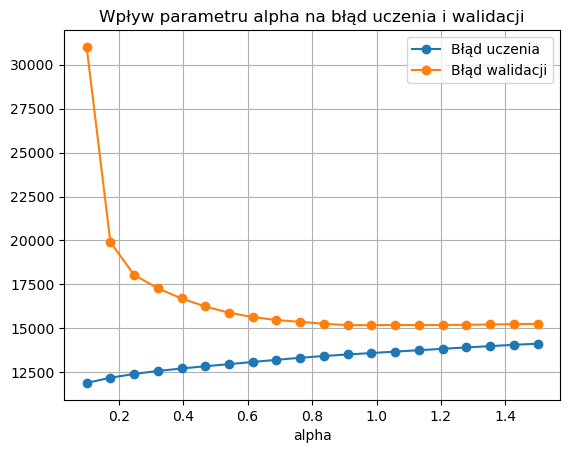

In [52]:
#regularyzacja 
regression_model = LinearRegression()
    
poly_model = PolynomialFeatures(degree=degree)

poly_micro_train = poly_model.fit_transform(micro_train_sf)
poly_micro_valid = poly_model.fit_transform(micro_valid_sf)
poly_micro_test = poly_model.fit_transform(micro_test_sf)

feature_names = poly_model.get_feature_names_out()
print(f"Początkowa liczba współczynników: {len(feature_names)}")
    
scaler = StandardScaler()

poly_micro_train_scaled = scaler.fit_transform(poly_micro_train)
poly_micro_valid_scaled = scaler.fit_transform(poly_micro_valid)

alphas = np.linspace(0.1, 1.5, 20)

list_error_train = []
list_error_valid = []

list_lasso_coefs = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(poly_micro_train_scaled, cal_micro_train)
    
    lasso_coefs = pd.Series(lasso.coef_, index=feature_names)

    list_lasso_coefs.append(lasso_coefs)
    
    preds_train = lasso.predict(poly_micro_train_scaled)
    preds_valid = lasso.predict(poly_micro_valid_scaled)
    
    error_train = mse(cal_micro_train, preds_train)
    error_valid = mse(cal_micro_valid, preds_valid)
    
    list_error_train.append(error_train)
    list_error_valid.append(error_valid)    


plt.plot(alphas, list_error_train, marker='o', label="Błąd uczenia")
plt.plot(alphas, list_error_valid, marker='o', label="Błąd walidacji")

plt.xlabel('alpha')
plt.legend()
plt.grid()
plt.title('Wpływ parametru alpha na błąd uczenia i walidacji')

idx = list_error_valid.index(min(list_error_valid))
alpha = alphas[idx]
print(f"Wybrana wartość parametru alpha: {alpha}")
lasso_coefs = list_lasso_coefs[idx]
lasso_features = lasso_coefs[lasso_coefs != 0].index.tolist()
print(f"Końcowa liczba współczynników: {len(lasso_features)}")
print(f"Wybrane kombinacje cech przez model Lasso: {lasso_features}")


<div style="background-color: #e4ede6; padding:30px;">
Końcowym etapem jest dopasowanie regresji liniowej. Nieliniowość została wprowadzona poprzez zastosowanie zmiennych w postaci kombinacji cech. Ostatecznie model przewiduje kaloryczność średnio z dokładnością 103 kalorii i medianą błędu równą 59. Jest to całkiem dobry wynik, biorąc pod uwagę, że mikroskładniki same w sobie nie zawierają kalorii. 
    
Najbardziej istotnymi zmiennymi okazały się:
    
    * iloczyn występowania witaminy D oraz występowania sodu
    
    * zawartość witaminy B1 (tiaminy)
    
    * iloczyn zawartości witaminy B1 (tiaminy) i występowania sodu
    
    * iloczyn logarytmu zawartości witaminy D i występowania sodu
    
    * iloczyn występowania witaminy C i występowania sodu

</div>

In [53]:
indices = [i for i, x in enumerate(feature_names) if x in lasso_features]

micro_train_final = [[x for i, x in enumerate(record) if i in indices] for record in poly_micro_train]
micro_valid_final = [[x for i, x in enumerate(record) if i in indices] for record in poly_micro_valid]
micro_test_final = [[x for i, x in enumerate(record) if i in indices] for record in poly_micro_test]

In [54]:
#trening modelu na wybranych kombinacjach cech
model = LinearRegression()
model.fit(micro_train_final, cal_micro_train)

preds_test = model.predict(micro_test_final)

In [55]:
mae = [abs(x - cal_micro_test.iloc[i]) for i, x in enumerate(list(preds_test))]
median_mae = np.median(mae)
mean_mae = np.mean(mae)

print(f"Mediana błędu bezwzględnego testowania: {median_mae}")
print(f"Średnia arytmetyczna błędu bezwzględnego testowania: {mean_mae}")

Mediana błędu bezwzględnego testowania: 60.9666828668598
Średnia arytmetyczna błędu bezwzględnego testowania: 104.41037593176041


In [56]:
len(model.coef_)
significant_indices = np.argsort(abs(model.coef_))[::-1]
significant_variables = [lasso_features[i] for i in significant_indices[:5]]
significant_coefs = [model.coef_[i] for i in significant_indices[:5]]

print(f"Najbardziej istotne kombinacje cech: {significant_variables}")
print(f"Współczynniki powyższych cech: {significant_coefs}")

print(f"Wartość wyrazu wolnego: {model.intercept_}")

Najbardziej istotne kombinacje cech: ['thiamin_mg', 'selenium_mcg_cannot_log manganese_mg_cannot_log', 'vitamin_c_mg_log vitamin_c_mg_cannot_log', 'manganese_mg_log', 'vitamin_c_mg_log']
Współczynniki powyższych cech: [153.46752109347702, 48.44226445346392, 41.4367634342329, 41.258815625210026, -36.63293450973376]
Wartość wyrazu wolnego: 133.97815583611072
